In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
import warnings 
warnings.filterwarnings("ignore")

In [18]:
customers=pd.read_csv("archive/olist_customers_dataset.csv")
geolocation=pd.read_csv("archive/olist_geolocation_dataset.csv")
order_items=pd.read_csv("archive/olist_order_items_dataset.csv")
order_payments=pd.read_csv("archive/olist_order_payments_dataset.csv")
order_reviews=pd.read_csv("archive/olist_order_reviews_dataset.csv")
orders=pd.read_csv("archive/olist_orders_dataset.csv")
products=pd.read_csv("archive/olist_products_dataset.csv")
sellers=pd.read_csv("archive/olist_sellers_dataset.csv")
product_category_name=pd.read_csv("archive/product_category_name_translation.csv")

# Data cleaning phase

# Customers Table

In [19]:
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [20]:
customers.tail()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS
99440,274fa6071e5e17fe303b9748641082c8,84732c5050c01db9b23e19ba39899398,6703,cotia,SP


In [21]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [22]:
customers.shape

(99441, 5)

In [23]:
customers.columns

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state'],
      dtype='object')

In [24]:
customers.dtypes

customer_id                 object
customer_unique_id          object
customer_zip_code_prefix     int64
customer_city               object
customer_state              object
dtype: object

# check duplicates

In [25]:
customers.duplicated().sum()

np.int64(0)

# check missing values

In [26]:
customers.isnull().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

#  data types

In [27]:
customers.dtypes

customer_id                 object
customer_unique_id          object
customer_zip_code_prefix     int64
customer_city               object
customer_state              object
dtype: object

# inconsistent categories

In [28]:
customers['customer_city'].unique()

array(['franca', 'sao bernardo do campo', 'sao paulo', ...,
       'monte bonito', 'sao rafael', 'eugenio de castro'],
      shape=(4119,), dtype=object)

In [29]:
customers['customer_state'].unique()

array(['SP', 'SC', 'MG', 'PR', 'RJ', 'RS', 'PA', 'GO', 'ES', 'BA', 'MA',
       'MS', 'CE', 'DF', 'RN', 'PE', 'MT', 'AM', 'AP', 'AL', 'RO', 'PB',
       'TO', 'PI', 'AC', 'SE', 'RR'], dtype=object)

# Handling outlaires

customer_zip_code_prefix column

<Axes: xlabel='customer_zip_code_prefix'>

<Axes: xlabel='customer_zip_code_prefix'>

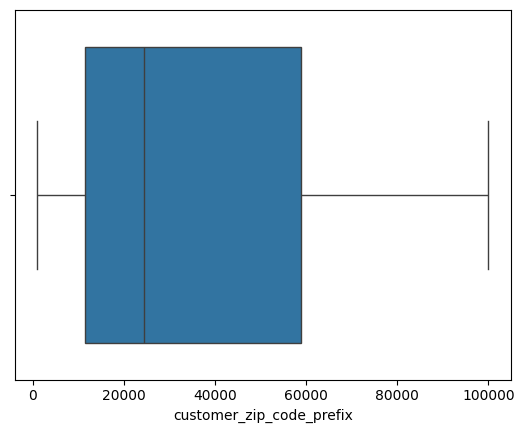

In [30]:
sns.boxplot(x=customers['customer_zip_code_prefix'])

In [31]:
customers['customer_zip_code_prefix'].describe()

count    99441.000000
mean     35137.474583
std      29797.938996
min       1003.000000
25%      11347.000000
50%      24416.000000
75%      58900.000000
max      99990.000000
Name: customer_zip_code_prefix, dtype: float64

# Geolocation table

In [32]:
geolocation.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [33]:
geolocation.tail()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
1000158,99950,-28.068639,-52.010705,tapejara,RS
1000159,99900,-27.877125,-52.224882,getulio vargas,RS
1000160,99950,-28.071855,-52.014716,tapejara,RS
1000161,99980,-28.388932,-51.846871,david canabarro,RS
1000162,99950,-28.070104,-52.018658,tapejara,RS


In [34]:
geolocation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [35]:
geolocation.shape

(1000163, 5)

In [36]:
geolocation.dtypes

geolocation_zip_code_prefix      int64
geolocation_lat                float64
geolocation_lng                float64
geolocation_city                object
geolocation_state               object
dtype: object

In [37]:
geolocation.columns

Index(['geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng',
       'geolocation_city', 'geolocation_state'],
      dtype='object')

# Handling missing values

In [38]:
geolocation.isnull().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

# check duplicates

In [39]:
geolocation.duplicated().sum()

np.int64(261831)

In [40]:
geolocation.drop_duplicates(inplace=True)


In [41]:
print(geolocation.duplicated().sum())

0


# Data types

In [42]:
geolocation.dtypes

geolocation_zip_code_prefix      int64
geolocation_lat                float64
geolocation_lng                float64
geolocation_city                object
geolocation_state               object
dtype: object

# inconsistent categories

In [43]:
geolocation['geolocation_city'].unique()

array(['sao paulo', 'são paulo', 'sao bernardo do campo', ..., 'ciríaco',
       'estação', 'vila lângaro'], shape=(8011,), dtype=object)

In [44]:
geolocation['geolocation_state'].unique()

array(['SP', 'RN', 'AC', 'RJ', 'ES', 'MG', 'BA', 'SE', 'PE', 'AL', 'PB',
       'CE', 'PI', 'MA', 'PA', 'AP', 'AM', 'RR', 'DF', 'GO', 'RO', 'TO',
       'MT', 'MS', 'RS', 'PR', 'SC'], dtype=object)

# Handling outlaires

geolocation_zip_code_prefix column

<Axes: xlabel='geolocation_zip_code_prefix'>

<Axes: xlabel='geolocation_zip_code_prefix'>

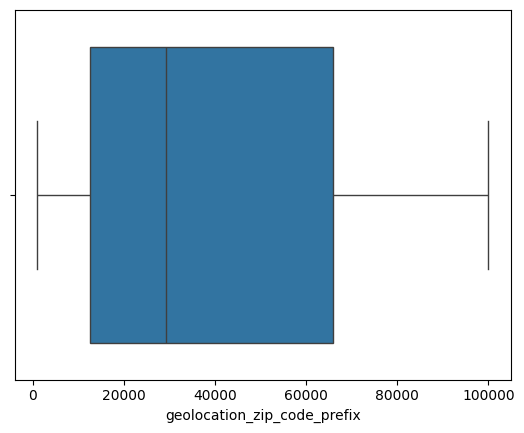

In [45]:
sns.boxplot(x=geolocation['geolocation_zip_code_prefix'])

In [46]:
customers['customer_zip_code_prefix'].describe()

count    99441.000000
mean     35137.474583
std      29797.938996
min       1003.000000
25%      11347.000000
50%      24416.000000
75%      58900.000000
max      99990.000000
Name: customer_zip_code_prefix, dtype: float64

geolocation_lat column

<Axes: xlabel='geolocation_lat'>

<Axes: xlabel='geolocation_lat'>

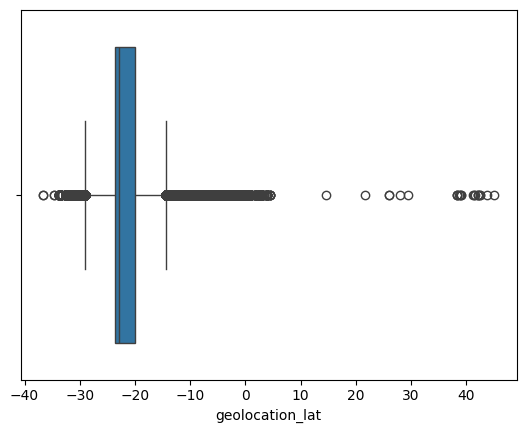

In [47]:
sns.boxplot(x=geolocation['geolocation_lat'])

In [48]:
geolocation['geolocation_lat'].describe()

count    738332.000000
mean        -20.998353
std           5.892315
min         -36.605374
25%         -23.603061
50%         -22.873588
75%         -19.923336
max          45.065933
Name: geolocation_lat, dtype: float64

In [60]:
median_geolocation_lat= geolocation['geolocation_lat'].median()

print(f"Median is: { median_geolocation_lat}")

Median is: -22.873588225476848


In [61]:
Q1 = geolocation['geolocation_lat'].quantile(0.25)
Q3 = geolocation['geolocation_lat'].quantile(0.75)
IQR = Q3 - Q1

upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR

upper_limit, lower_limit

(np.float64(-14.403749454509102), np.float64(-29.122647622252906))

In [62]:
geolocation['geolocation_lat'] = np.where(
    (geolocation['geolocation_lat'] < lower_limit) | (geolocation['geolocation_lat'] > upper_limit),
    median_geolocation_lat,
    geolocation['geolocation_lat']
)

<Axes: xlabel='geolocation_lat'>

<Axes: xlabel='geolocation_lat'>

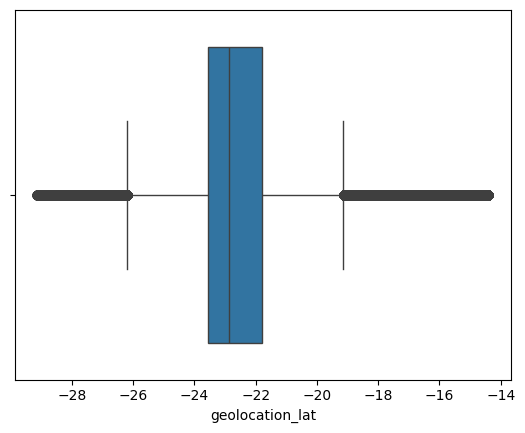

In [63]:
sns.boxplot(x=geolocation['geolocation_lat'])

In [64]:
geolocation['geolocation_lat'].describe()

count    738332.000000
mean        -22.506499
std           2.365771
min         -29.122644
25%         -23.547405
50%         -22.873588
75%         -21.780591
max         -14.403929
Name: geolocation_lat, dtype: float64

geolocation_lng column

<Axes: xlabel='geolocation_lng'>

<Axes: xlabel='geolocation_lng'>

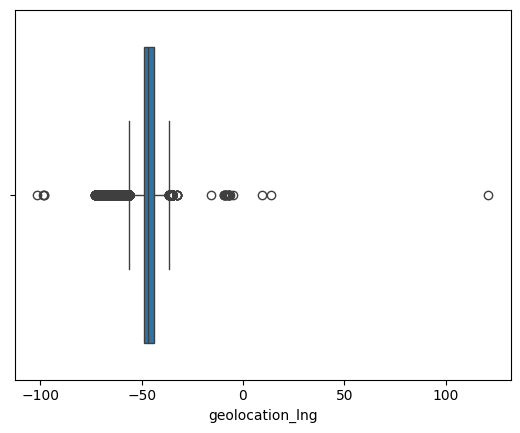

In [65]:
sns.boxplot(x=geolocation['geolocation_lng'])

In [66]:
geolocation['geolocation_lng'].describe()

count    738332.000000
mean        -46.461098
std           4.393705
min        -101.466766
25%         -48.867822
50%         -46.647278
75%         -43.836974
max         121.105394
Name: geolocation_lng, dtype: float64

In [71]:
median_geolocation_lng= geolocation['geolocation_lng'].median()

print(f"Median is: { median_geolocation_lng}")

Median is: -46.64727808055859


In [68]:
Q1 = geolocation['geolocation_lng'].quantile(0.25)
Q3 = geolocation['geolocation_lng'].quantile(0.75)
IQR = Q3 - Q1

upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR

upper_limit, lower_limit

(np.float64(-36.290701514836016), np.float64(-56.4140942114977))

In [72]:
geolocation['geolocation_lng'] = np.where(
    (geolocation['geolocation_lng'] < lower_limit) | (geolocation['geolocation_lng'] > upper_limit),
    median_geolocation_lng,
    geolocation['geolocation_lng']
)

<Axes: xlabel='geolocation_lng'>

<Axes: xlabel='geolocation_lng'>

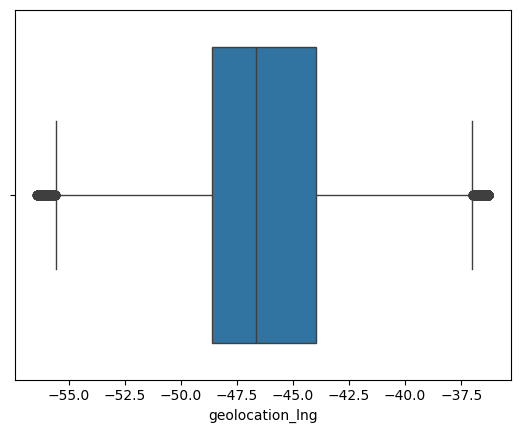

In [73]:
sns.boxplot(x=geolocation['geolocation_lng'])

In [74]:
geolocation['geolocation_lng'].describe()

count    738332.000000
mean        -46.566972
std           3.610788
min         -56.398378
25%         -48.633582
50%         -46.647278
75%         -43.980028
max         -36.290761
Name: geolocation_lng, dtype: float64

# Order_items Table

In [75]:
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [76]:
order_items.tail(5)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72
112649,fffe41c64501cc87c801fd61db3f6244,1,350688d9dc1e75ff97be326363655e01,f7ccf836d21b2fb1de37564105216cc1,2018-06-12 17:10:13,43.00,12.79


In [77]:
order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [78]:
order_items.shape

(112650, 7)

In [79]:
order_items.columns

Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value'],
      dtype='object')

In [80]:
order_items.dtypes

order_id                object
order_item_id            int64
product_id              object
seller_id               object
shipping_limit_date     object
price                  float64
freight_value          float64
dtype: object

# Missing values

In [81]:
order_items.isnull().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

# duplicates

In [82]:
order_items.duplicated().sum()

np.int64(0)

# Data types

In [83]:
order_items.dtypes

order_id                object
order_item_id            int64
product_id              object
seller_id               object
shipping_limit_date     object
price                  float64
freight_value          float64
dtype: object

In [84]:
order_items['shipping_limit_date'] = pd.to_datetime(order_items['shipping_limit_date'])

In [85]:
order_items.dtypes

order_id                       object
order_item_id                   int64
product_id                     object
seller_id                      object
shipping_limit_date    datetime64[ns]
price                         float64
freight_value                 float64
dtype: object

# Checking outlaires

order_item_id column

<Axes: xlabel='order_item_id'>

<Axes: xlabel='order_item_id'>

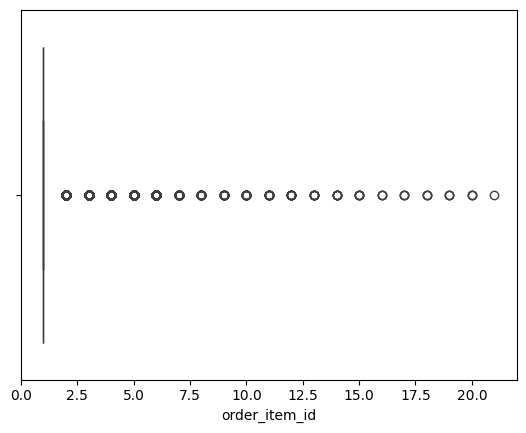

In [86]:
sns.boxplot(x=order_items['order_item_id'])

In [87]:
order_items['order_item_id'].describe()

count    112650.000000
mean          1.197834
std           0.705124
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max          21.000000
Name: order_item_id, dtype: float64

In [90]:
median_order_item_id= order_items['order_item_id'].median()

print(f"Median is: { median_order_item_id}")

Median is: 1.0


In [91]:
Q1 = order_items['order_item_id'].quantile(0.25)
Q3 = order_items['order_item_id'].quantile(0.75)
IQR = Q3 - Q1

upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR

upper_limit, lower_limit

(np.float64(1.0), np.float64(1.0))

In [92]:
order_items['order_item_id'] = np.where(
    (order_items['order_item_id'] < lower_limit) | (order_items['order_item_id'] > upper_limit),
    median_order_item_id,
    order_items['order_item_id']
)

<Axes: xlabel='order_item_id'>

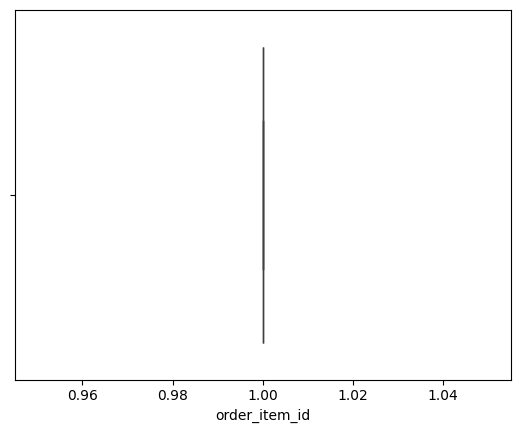

In [93]:
sns.boxplot(x=order_items['order_item_id'])

In [94]:
order_items['order_item_id'].describe()

count    112650.0
mean          1.0
std           0.0
min           1.0
25%           1.0
50%           1.0
75%           1.0
max           1.0
Name: order_item_id, dtype: float64

price column

<Axes: xlabel='price'>

<Axes: xlabel='price'>

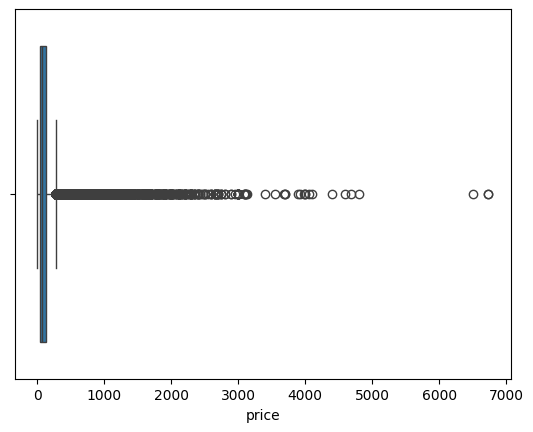

In [95]:
sns.boxplot(x=order_items['price'])

In [96]:
order_items['price'].describe()

count    112650.000000
mean        120.653739
std         183.633928
min           0.850000
25%          39.900000
50%          74.990000
75%         134.900000
max        6735.000000
Name: price, dtype: float64

In [97]:
median_price= order_items['price'].median()

print(f"Median is: { median_price}")

Median is: 74.99


In [98]:
Q1 = order_items['price'].quantile(0.25)
Q3 = order_items['price'].quantile(0.75)
IQR = Q3 - Q1

upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR

upper_limit, lower_limit

(np.float64(277.4), np.float64(-102.6))

In [99]:
order_items['price'] = np.where(
    (order_items['price'] < lower_limit) | (order_items['price'] > upper_limit),
    median_price,
    order_items['price']
)

<Axes: xlabel='price'>

<Axes: xlabel='price'>

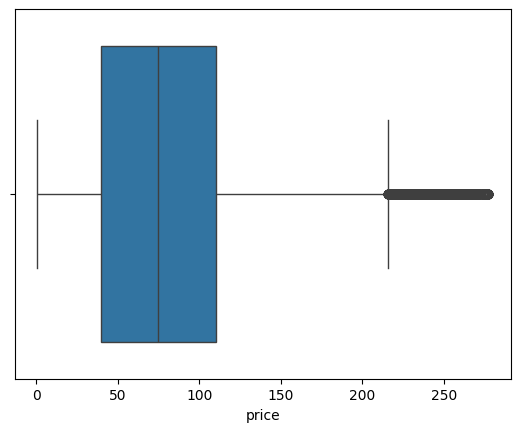

In [100]:
sns.boxplot(x=order_items['price'])

In [101]:
order_items['price'].describe()

count    112650.000000
mean         83.302553
std          56.395857
min           0.850000
25%          39.900000
50%          74.990000
75%         110.320000
max         277.300000
Name: price, dtype: float64

freight_value column

<Axes: xlabel='freight_value'>

<Axes: xlabel='freight_value'>

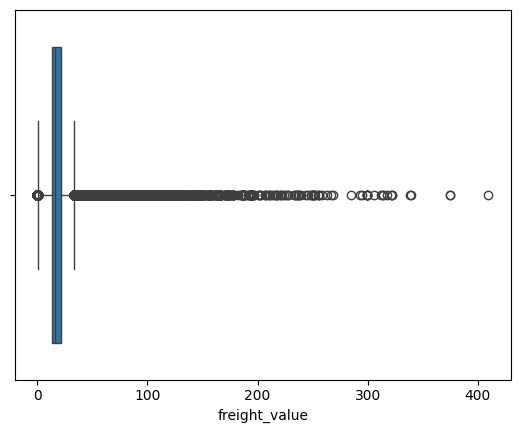

In [102]:
sns.boxplot(x=order_items['freight_value'])

In [103]:
order_items['freight_value'].describe()

count    112650.000000
mean         19.990320
std          15.806405
min           0.000000
25%          13.080000
50%          16.260000
75%          21.150000
max         409.680000
Name: freight_value, dtype: float64

In [104]:
median_freight_value= order_items['freight_value'].median()

print(f"Median is: { median_freight_value}")

Median is: 16.26


In [105]:
Q1 = order_items['freight_value'].quantile(0.25)
Q3 = order_items['freight_value'].quantile(0.75)
IQR = Q3 - Q1

upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR

upper_limit, lower_limit

(np.float64(33.254999999999995), np.float64(0.9750000000000032))

In [106]:
order_items['freight_value'] = np.where(
    (order_items['freight_value'] < lower_limit) | (order_items['freight_value'] > upper_limit),
    median_freight_value,
    order_items['freight_value']
)

<Axes: xlabel='freight_value'>

<Axes: xlabel='freight_value'>

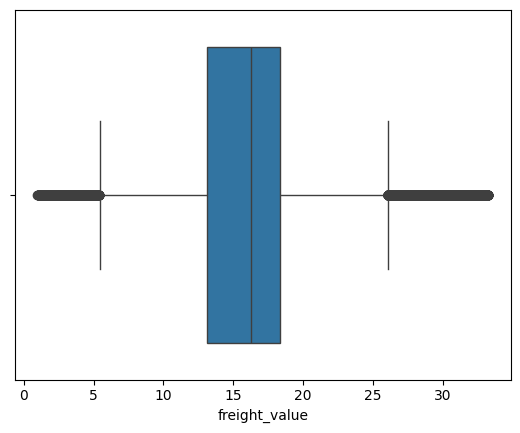

In [107]:
sns.boxplot(x=order_items['freight_value'])

In [108]:
order_items['freight_value'].describe()

count    112650.000000
mean         16.140152
std           5.165819
min           0.980000
25%          13.150000
50%          16.260000
75%          18.310000
max          33.250000
Name: freight_value, dtype: float64

# Order payments Table

In [109]:
order_payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [110]:
order_payments.tail()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54
103885,28bbae6599b09d39ca406b747b6632b1,1,boleto,1,191.58


In [111]:
order_payments.shape

(103886, 5)

In [112]:
order_payments.columns

Index(['order_id', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value'],
      dtype='object')

In [113]:
order_payments.dtypes

order_id                 object
payment_sequential        int64
payment_type             object
payment_installments      int64
payment_value           float64
dtype: object

In [114]:
order_payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


# Missing values

In [115]:
order_payments.isnull().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

# Duplicates

In [116]:
order_payments.duplicated().sum()

np.int64(0)

# Data types

In [117]:
order_payments.dtypes

order_id                 object
payment_sequential        int64
payment_type             object
payment_installments      int64
payment_value           float64
dtype: object

In [118]:
order_payments['payment_type'] = order_payments['payment_type'].astype('category')

In [119]:
order_payments.dtypes

order_id                  object
payment_sequential         int64
payment_type            category
payment_installments       int64
payment_value            float64
dtype: object

# Inconsistent categories

In [120]:
order_payments['payment_type'].unique()

['credit_card', 'boleto', 'voucher', 'debit_card', 'not_defined']
Categories (5, object): ['boleto', 'credit_card', 'debit_card', 'not_defined', 'voucher']

# Checking outlaires

payment_sequential column

<Axes: xlabel='payment_sequential'>

<Axes: xlabel='payment_sequential'>

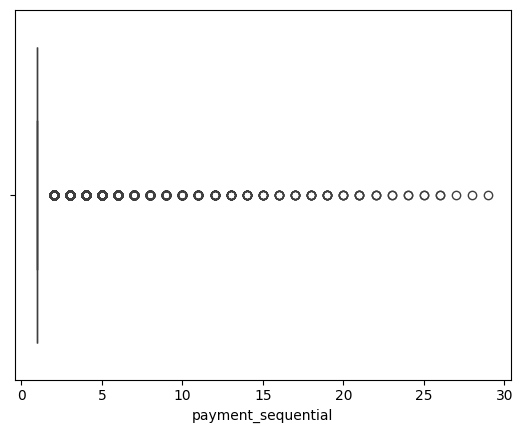

In [121]:
sns.boxplot(x=order_payments['payment_sequential'])

In [122]:
order_payments['payment_sequential'].describe()

count    103886.000000
mean          1.092679
std           0.706584
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max          29.000000
Name: payment_sequential, dtype: float64

In [123]:
median_order_payments= order_payments['payment_sequential'].median()

print(f"Median is: { median_order_payments}")

Median is: 1.0


In [124]:
Q1 = order_payments['payment_sequential'].quantile(0.25)
Q3 = order_payments['payment_sequential'].quantile(0.75)
IQR = Q3 - Q1

upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR

upper_limit, lower_limit

(np.float64(1.0), np.float64(1.0))

In [125]:
order_payments['payment_sequential'] = np.where(
    (order_payments['payment_sequential'] < lower_limit) | (order_payments['payment_sequential'] > upper_limit),
    median_order_payments,
    order_payments['payment_sequential']
)

<Axes: xlabel='payment_sequential'>

<Axes: xlabel='payment_sequential'>

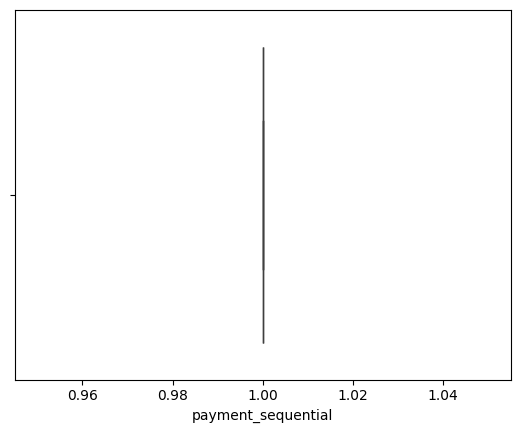

In [126]:
sns.boxplot(x=order_payments['payment_sequential'])

In [127]:
order_payments['payment_sequential'].describe()

count    103886.0
mean          1.0
std           0.0
min           1.0
25%           1.0
50%           1.0
75%           1.0
max           1.0
Name: payment_sequential, dtype: float64

 payment_installments column


<Axes: xlabel='payment_installments'>

<Axes: xlabel='payment_installments'>

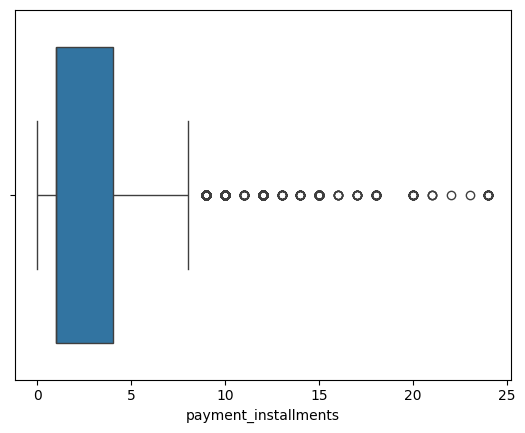

In [128]:
sns.boxplot(x=order_payments['payment_installments'])

In [129]:
order_payments['payment_installments'].describe()

count    103886.000000
mean          2.853349
std           2.687051
min           0.000000
25%           1.000000
50%           1.000000
75%           4.000000
max          24.000000
Name: payment_installments, dtype: float64

In [130]:
median_order_payments= order_payments['payment_installments'].median()

print(f"Median is: { median_order_payments}")

Median is: 1.0


In [131]:
Q1 = order_payments['payment_installments'].quantile(0.25)
Q3 = order_payments['payment_installments'].quantile(0.75)
IQR = Q3 - Q1

upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR

upper_limit, lower_limit

(np.float64(8.5), np.float64(-3.5))

In [132]:
order_payments['payment_installments'] = np.where(
    (order_payments['payment_installments'] < lower_limit) | (order_payments['payment_installments'] > upper_limit),
    median_order_payments,
    order_payments['payment_installments']
)

<Axes: xlabel='payment_installments'>

<Axes: xlabel='payment_installments'>

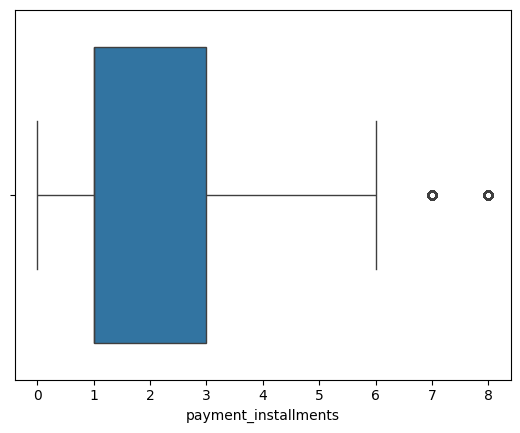

In [133]:
sns.boxplot(x=order_payments['payment_installments'])

In [134]:
order_payments['payment_installments'].describe()

count    103886.000000
mean          2.297721
std           1.944211
min           0.000000
25%           1.000000
50%           1.000000
75%           3.000000
max           8.000000
Name: payment_installments, dtype: float64

 payment_value column

<Axes: xlabel='payment_value'>

<Axes: xlabel='payment_value'>

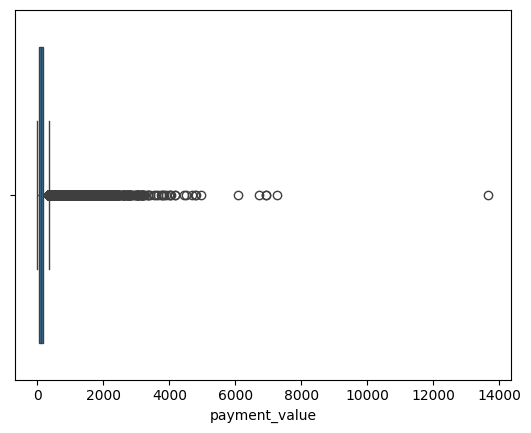

In [135]:
sns.boxplot(x=order_payments['payment_value'])

In [136]:
order_payments['payment_value'].describe()

count    103886.000000
mean        154.100380
std         217.494064
min           0.000000
25%          56.790000
50%         100.000000
75%         171.837500
max       13664.080000
Name: payment_value, dtype: float64

In [137]:
median_payment_value= order_payments['payment_value'].median()

print(f"Median is: { median_payment_value}")

Median is: 100.0


In [138]:
Q1 = order_payments['payment_value'].quantile(0.25)
Q3 = order_payments['payment_value'].quantile(0.75)
IQR = Q3 - Q1

upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR

upper_limit, lower_limit

(np.float64(344.40875000000005), np.float64(-115.78125000000003))

In [139]:
order_payments['payment_value'] = np.where(
    (order_payments['payment_value'] < lower_limit) | (order_payments['payment_value'] > upper_limit),
    median_order_payments,
    order_payments['payment_value']
)

<Axes: xlabel='payment_value'>

<Axes: xlabel='payment_value'>

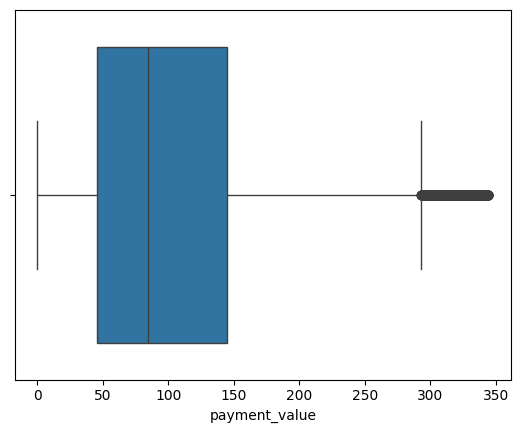

In [140]:
sns.boxplot(x=order_payments['payment_value'])

In [141]:
order_payments['payment_value'].describe()

count    103886.000000
mean        101.683479
std          75.724959
min           0.000000
25%          45.480000
50%          84.665000
75%         144.560000
max         344.340000
Name: payment_value, dtype: float64

# Order_reviews

In [142]:
order_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [143]:
order_reviews.tail()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13
99223,efe49f1d6f951dd88b51e6ccd4cc548f,90531360ecb1eec2a1fbb265a0db0508,1,NaN,"meu produto chegou e ja tenho que devolver, po...",2017-07-03 00:00:00,2017-07-03 21:01:49


In [144]:
order_reviews.shape

(99224, 7)

In [145]:
order_reviews.columns

Index(['review_id', 'order_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp'],
      dtype='object')

In [146]:
order_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [147]:
order_reviews.dtypes

review_id                  object
order_id                   object
review_score                int64
review_comment_title       object
review_comment_message     object
review_creation_date       object
review_answer_timestamp    object
dtype: object

# Duplicates

In [148]:
order_reviews.duplicated().sum()

np.int64(0)

# Missing values

In [149]:
order_reviews.isnull().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [150]:
order_reviews['review_comment_title'].fillna('No Title', inplace=True)
order_reviews['review_comment_message'].fillna('No Comment', inplace=True)

In [151]:
order_reviews.isnull().sum()

review_id                  0
order_id                   0
review_score               0
review_comment_title       0
review_comment_message     0
review_creation_date       0
review_answer_timestamp    0
dtype: int64

# Data types

In [152]:
order_reviews.dtypes

review_id                  object
order_id                   object
review_score                int64
review_comment_title       object
review_comment_message     object
review_creation_date       object
review_answer_timestamp    object
dtype: object

In [153]:
order_reviews['review_creation_date'] = pd.to_datetime(order_reviews['review_creation_date'])
order_reviews['review_answer_timestamp'] = pd.to_datetime(order_reviews['review_answer_timestamp'])

In [154]:
order_reviews.dtypes

review_id                          object
order_id                           object
review_score                        int64
review_comment_title               object
review_comment_message             object
review_creation_date       datetime64[ns]
review_answer_timestamp    datetime64[ns]
dtype: object

# Inconsistent categories

In [155]:
order_reviews['review_comment_title'].unique()

array(['No Title', 'recomendo', 'Super recomendo', ...,
       'Não foi entregue o pedido', 'OTIMA EMBALAGEM', 'Foto enganosa '],
      shape=(4528,), dtype=object)

In [156]:
order_reviews['review_comment_message'].unique()

array(['No Comment', 'Recebi bem antes do prazo estipulado.',
       'Parabéns lojas lannister adorei comprar pela Internet seguro e prático Parabéns a todos feliz Páscoa',
       ...,
       'O produto não foi enviado com NF, não existe venda sem NF, com certeza fico no aguardo do envio da NF podendo ser por e-mail.',
       'Excelente mochila, entrega super rápida. Super recomendo essa loja!',
       'meu produto chegou e ja tenho que devolver, pois está com defeito , não segurar carga'],
      shape=(36160,), dtype=object)

# Handling outlaires

review_score column

<Axes: xlabel='review_score'>

<Axes: xlabel='review_score'>

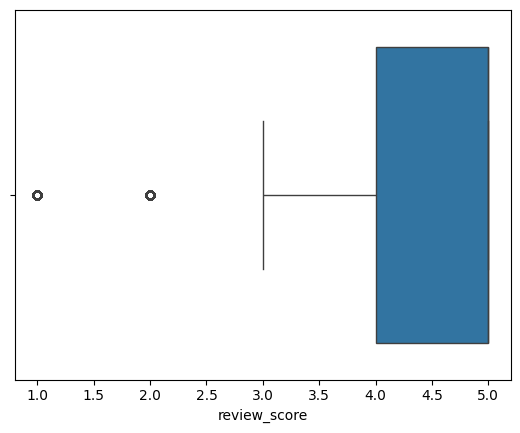

In [157]:
sns.boxplot(x=order_reviews['review_score'])

In [158]:
order_reviews['review_score'].describe()


count    99224.000000
mean         4.086421
std          1.347579
min          1.000000
25%          4.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: review_score, dtype: float64

In [159]:
median_review_score= order_reviews['review_score'].median()

print(f"Median is: { median_review_score}")

Median is: 5.0


In [160]:
Q1 = order_reviews['review_score'].quantile(0.25)
Q3 = order_reviews['review_score'].quantile(0.75)
IQR = Q3 - Q1

upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR

upper_limit, lower_limit

(np.float64(6.5), np.float64(2.5))

In [161]:
order_reviews['review_score'] = np.where(
    (order_reviews['review_score'] < lower_limit) | (order_reviews['review_score'] > upper_limit),
    median_review_score,
    order_reviews['review_score']
)

<Axes: xlabel='review_score'>

<Axes: xlabel='review_score'>

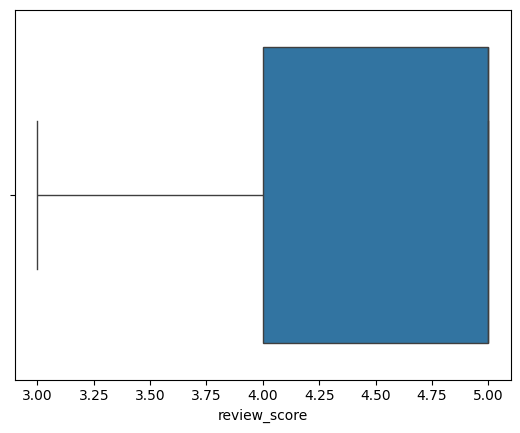

In [162]:
sns.boxplot(x=order_reviews['review_score'])

In [163]:
order_reviews['review_score'].describe()

count    99224.000000
mean         4.642224
std          0.628200
min          3.000000
25%          4.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: review_score, dtype: float64

# Orders Table

In [164]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [165]:
orders.tail()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00
99440,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,2018-03-08 20:57:30,2018-03-09 11:20:28,2018-03-09 22:11:59,2018-03-16 13:08:30,2018-04-03 00:00:00


In [166]:
orders.shape

(99441, 8)

In [167]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [168]:
orders.dtypes

order_id                         object
customer_id                      object
order_status                     object
order_purchase_timestamp         object
order_approved_at                object
order_delivered_carrier_date     object
order_delivered_customer_date    object
order_estimated_delivery_date    object
dtype: object

In [169]:
orders.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date'],
      dtype='object')

# Duplicates

In [170]:
orders.duplicated().sum()

np.int64(0)

# Manage data types 

In [171]:
orders.dtypes

order_id                         object
customer_id                      object
order_status                     object
order_purchase_timestamp         object
order_approved_at                object
order_delivered_carrier_date     object
order_delivered_customer_date    object
order_estimated_delivery_date    object
dtype: object

In [172]:
orders['order_approved_at'] = pd.to_datetime(orders['order_approved_at'])
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])
orders['order_delivered_carrier_date'] = pd.to_datetime(orders['order_delivered_carrier_date'])
orders['order_delivered_customer_date'] = pd.to_datetime(orders['order_delivered_customer_date'])
orders['order_estimated_delivery_date'] = pd.to_datetime(orders['order_estimated_delivery_date'])

In [173]:
orders.dtypes

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
dtype: object

# Missing values

In [174]:
orders.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [175]:
import numpy as np
orders['order_approved_at'] = orders['order_approved_at'].fillna(orders['order_purchase_timestamp'])
date_cols = ['order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']
for col in date_cols:
    orders[col] = pd.to_datetime(orders[col], errors='coerce')
orders['order_delivered_carrier_date'] = orders['order_delivered_carrier_date'].fillna(orders['order_estimated_delivery_date'])
orders['order_delivered_customer_date'] = orders['order_delivered_customer_date'].fillna(orders['order_estimated_delivery_date'])
orders['delay'] = orders['order_delivered_customer_date'] - orders['order_estimated_delivery_date']
print(orders.isnull().sum())

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
delay                            0
dtype: int64


In [176]:
orders.head(2)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delay
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,-8 days +21:25:13
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,-6 days +15:27:45


In [177]:
orders.isnull().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
delay                            0
dtype: int64

# Products Table

In [178]:
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [179]:
products.tail()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0
32950,106392145fca363410d287a815be6de4,cama_mesa_banho,58.0,309.0,1.0,2083.0,12.0,2.0,7.0


In [180]:
products.shape

(32951, 9)

In [181]:
products.columns

Index(['product_id', 'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm'],
      dtype='object')

In [182]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


# Check duplicates

In [183]:
products.duplicated().sum()

np.int64(0)

# Data types

In [184]:
products.dtypes

product_id                     object
product_category_name          object
product_name_lenght           float64
product_description_lenght    float64
product_photos_qty            float64
product_weight_g              float64
product_length_cm             float64
product_height_cm             float64
product_width_cm              float64
dtype: object

# Handling Outlaires 

product_name_lenght column

<Axes: xlabel='product_name_lenght'>

<Axes: xlabel='product_name_lenght'>

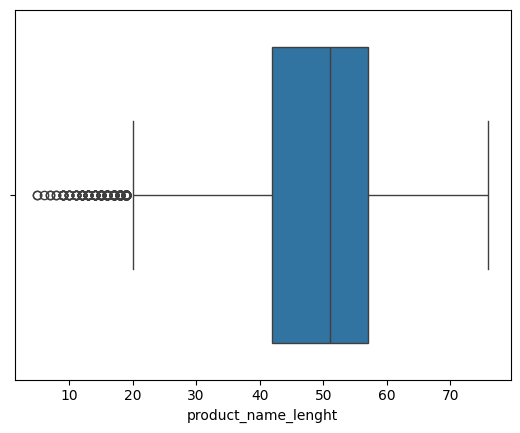

In [185]:
sns.boxplot(x=products['product_name_lenght'])

In [186]:
products['product_name_lenght'].describe()

count    32341.000000
mean        48.476949
std         10.245741
min          5.000000
25%         42.000000
50%         51.000000
75%         57.000000
max         76.000000
Name: product_name_lenght, dtype: float64

In [187]:
median_product_name_lenght = products['product_name_lenght'].median()

print(f"Median is: { median_product_name_lenght}")

Median is: 51.0


In [188]:
Q1 = products['product_name_lenght'].quantile(0.25)
Q3 = products['product_name_lenght'].quantile(0.75)
IQR = Q3 - Q1

upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR

upper_limit, lower_limit

(np.float64(79.5), np.float64(19.5))

In [189]:
products['product_name_lenght'] = np.where(
    (products['product_name_lenght'] < lower_limit) | (products['product_name_lenght'] > upper_limit),
    median_product_name_lenght,
    products['product_name_lenght']
)

In [190]:
products['product_name_lenght'].describe()

count    32341.000000
mean        48.790235
std          9.768769
min         20.000000
25%         42.000000
50%         51.000000
75%         57.000000
max         76.000000
Name: product_name_lenght, dtype: float64

<Axes: xlabel='product_name_lenght'>

<Axes: xlabel='product_name_lenght'>

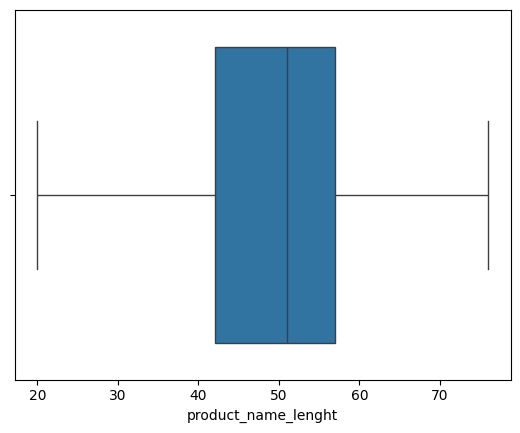

In [191]:
sns.boxplot(x=products['product_name_lenght'])

product_description_lenght column

<Axes: xlabel='product_description_lenght'>

<Axes: xlabel='product_description_lenght'>

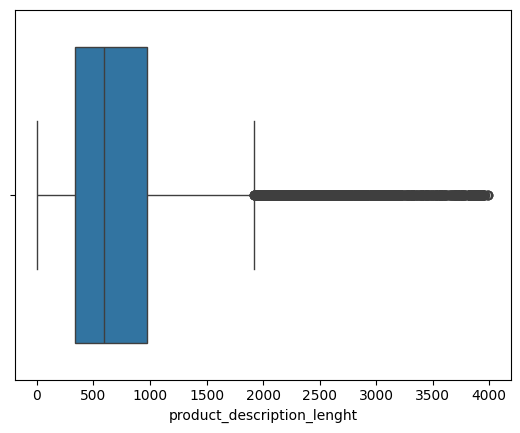

In [192]:
sns.boxplot(x=products['product_description_lenght'])

In [193]:
products['product_description_lenght'].describe()

count    32341.000000
mean       771.495285
std        635.115225
min          4.000000
25%        339.000000
50%        595.000000
75%        972.000000
max       3992.000000
Name: product_description_lenght, dtype: float64

In [205]:
median_product_description_lenght = products['product_description_lenght'].median()

print(f"Median is: { median_product_description_lenght}")

Median is: 595.0


In [ ]:
Q1 = products['product_description_lenght'].quantile(0.25)
Q3 = products['product_description_lenght'].quantile(0.75)
IQR = Q3 - Q1

upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR

upper_limit, lower_limit

(1921.5, -610.5)

In [ ]:
products['product_description_lenght'] = np.where(
    (products['product_description_lenght'] < lower_limit) | (products['product_description_lenght'] > upper_limit),
    median_product_description_lenght,
    products['product_description_lenght']
)

In [195]:
products['product_description_lenght'].describe()

count    32341.000000
mean       771.495285
std        635.115225
min          4.000000
25%        339.000000
50%        595.000000
75%        972.000000
max       3992.000000
Name: product_description_lenght, dtype: float64

<Axes: xlabel='product_description_lenght'>

<Axes: xlabel='product_description_lenght'>

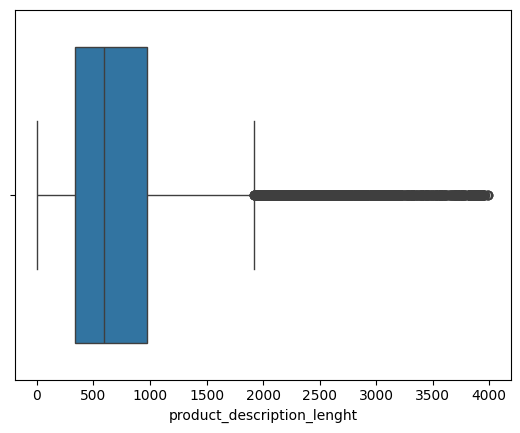

In [196]:

sns.boxplot(x=products['product_description_lenght'])

product_photos_qty column

<Axes: xlabel='product_photos_qty'>

<Axes: xlabel='product_photos_qty'>

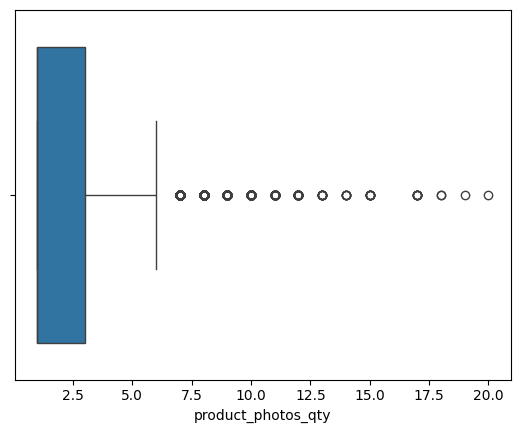

In [197]:

sns.boxplot(x=products['product_photos_qty'])

In [198]:
products['product_photos_qty'].describe()

count    32341.000000
mean         2.188986
std          1.736766
min          1.000000
25%          1.000000
50%          1.000000
75%          3.000000
max         20.000000
Name: product_photos_qty, dtype: float64

In [206]:
median_product_photos_qty = products['product_photos_qty'].median()

print(f"Median is: { median_product_photos_qty}")

Median is: 1.0


In [207]:
Q1 = products['product_photos_qty'].quantile(0.25)
Q3 = products['product_photos_qty'].quantile(0.75)
IQR = Q3 - Q1

upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR

upper_limit, lower_limit

(np.float64(6.0), np.float64(-2.0))

In [208]:
products['product_photos_qty'] = np.where(
    (products['product_photos_qty'] < lower_limit) | (products['product_photos_qty'] > upper_limit),
    median_product_photos_qty,
    products['product_photos_qty']
)

In [209]:
products['product_photos_qty'].describe()

count    32341.000000
mean         1.990786
std          1.359263
min          1.000000
25%          1.000000
50%          1.000000
75%          3.000000
max          6.000000
Name: product_photos_qty, dtype: float64

<Axes: xlabel='product_photos_qty'>

<Axes: xlabel='product_photos_qty'>

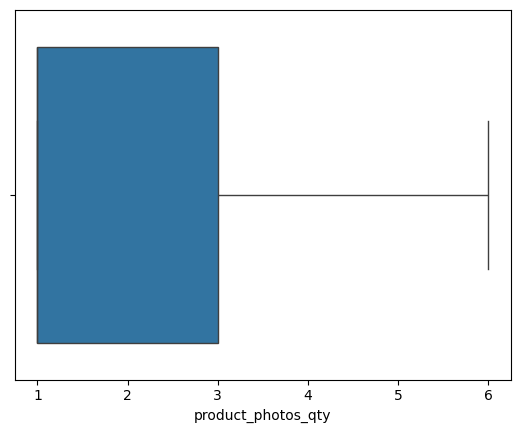

In [210]:

sns.boxplot(x=products['product_photos_qty'])

product_weight_g column

<Axes: xlabel='product_weight_g'>

<Axes: xlabel='product_weight_g'>

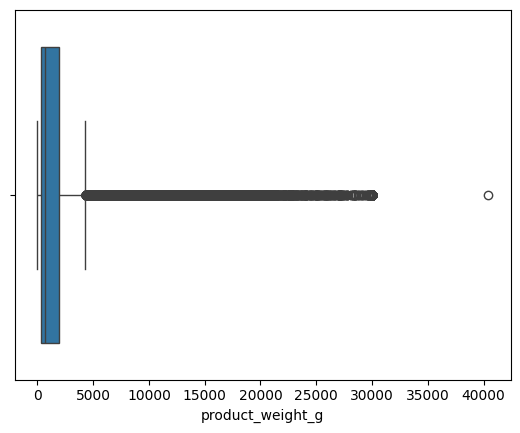

In [211]:

sns.boxplot(x=products['product_weight_g'])

In [212]:
products['product_weight_g'].describe()

count    32949.000000
mean      2276.472488
std       4282.038731
min          0.000000
25%        300.000000
50%        700.000000
75%       1900.000000
max      40425.000000
Name: product_weight_g, dtype: float64

In [213]:
median_product_weight_g = products['product_weight_g'].median()

print(f"Median is: { median_product_weight_g}")

Median is: 700.0


In [214]:
Q1 = products['product_weight_g'].quantile(0.25)
Q3 = products['product_weight_g'].quantile(0.75)
IQR = Q3 - Q1

upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR

upper_limit, lower_limit

(np.float64(4300.0), np.float64(-2100.0))

In [215]:
products['product_weight_g'] = np.where(
    (products['product_weight_g'] < lower_limit) | (products['product_weight_g'] > upper_limit),
    median_product_weight_g,
    products['product_weight_g']
)

In [216]:
products['product_weight_g'].describe()

count    32949.000000
mean       862.245713
std        817.028187
min          0.000000
25%        300.000000
50%        700.000000
75%       1050.000000
max       4300.000000
Name: product_weight_g, dtype: float64

<Axes: xlabel='product_weight_g'>

<Axes: xlabel='product_weight_g'>

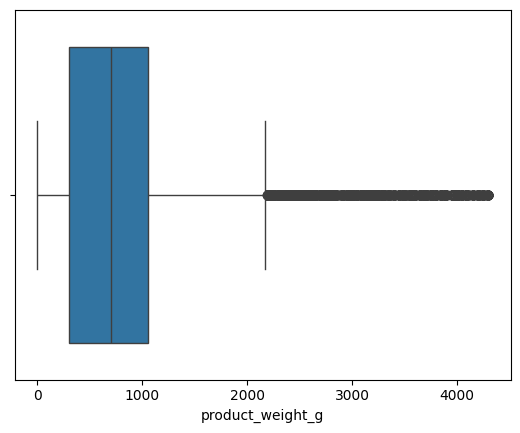

In [217]:

sns.boxplot(x=products['product_weight_g'])

product_length_cm column

<Axes: xlabel='product_length_cm'>

<Axes: xlabel='product_length_cm'>

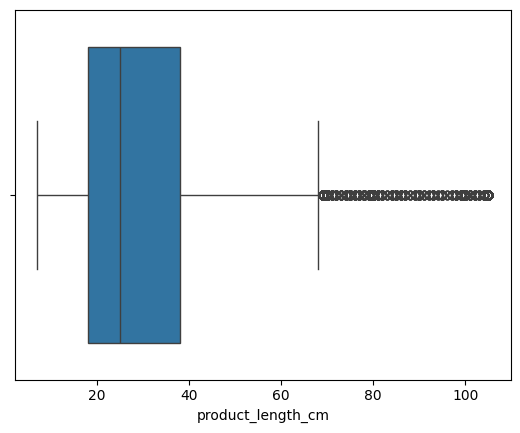

In [218]:

sns.boxplot(x=products['product_length_cm'])

In [219]:
products['product_length_cm'].describe()


count    32949.000000
mean        30.815078
std         16.914458
min          7.000000
25%         18.000000
50%         25.000000
75%         38.000000
max        105.000000
Name: product_length_cm, dtype: float64

In [220]:
median_product_length_cm= products['product_length_cm'].median()

print(f"Median is: { median_product_length_cm}")

Median is: 25.0


In [221]:
Q1 = products['product_length_cm'].quantile(0.25)
Q3 = products['product_length_cm'].quantile(0.75)
IQR = Q3 - Q1

upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR

upper_limit, lower_limit

(np.float64(68.0), np.float64(-12.0))

In [222]:
products['product_length_cm'] = np.where(
    (products['product_weight_g'] < lower_limit) | (products['product_length_cm'] > upper_limit),
    median_product_length_cm,
    products['product_length_cm']
)

In [223]:
products['product_length_cm'].describe()

count    32949.000000
mean        28.345929
std         12.491108
min          7.000000
25%         18.000000
50%         25.000000
75%         35.000000
max         68.000000
Name: product_length_cm, dtype: float64

<Axes: xlabel='product_length_cm'>

<Axes: xlabel='product_length_cm'>

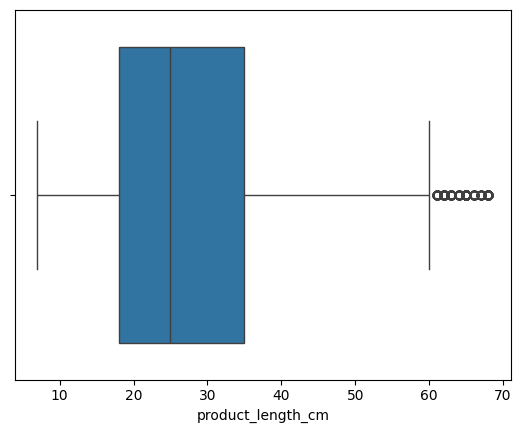

In [224]:
import seaborn as sns
sns.boxplot(x=products['product_length_cm'])

product_height_cm column

<Axes: xlabel='product_height_cm'>

<Axes: xlabel='product_height_cm'>

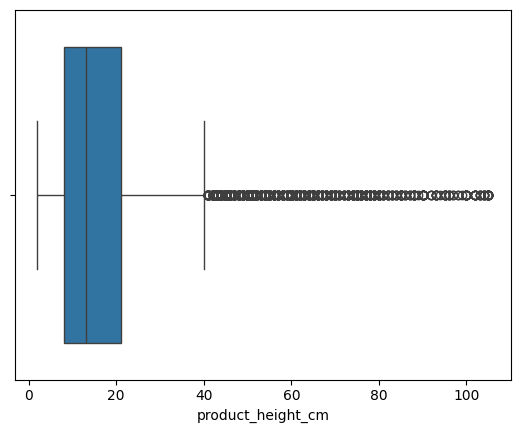

In [225]:
sns.boxplot(x=products['product_height_cm'])

In [226]:
products['product_height_cm'].describe()

count    32949.000000
mean        16.937661
std         13.637554
min          2.000000
25%          8.000000
50%         13.000000
75%         21.000000
max        105.000000
Name: product_height_cm, dtype: float64

In [228]:
median_product_height_cm= products['product_height_cm'].median()

print(f"Median is: { median_product_height_cm}")

Median is: 13.0


In [229]:
Q1 = products['product_height_cm'].quantile(0.25)
Q3 = products['product_height_cm'].quantile(0.75)
IQR = Q3 - Q1

upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR

upper_limit, lower_limit

(np.float64(40.5), np.float64(-11.5))

In [230]:
products['product_height_cm'] = np.where(
    (products['product_height_cm'] < lower_limit) | (products['product_height_cm'] > upper_limit),
    median_product_height_cm,
    products['product_height_cm']
)

In [231]:
products['product_height_cm'].describe()

count    32949.000000
mean        14.401651
std          8.690067
min          2.000000
25%          8.000000
50%         13.000000
75%         20.000000
max         40.000000
Name: product_height_cm, dtype: float64

<Axes: xlabel='product_height_cm'>

<Axes: xlabel='product_height_cm'>

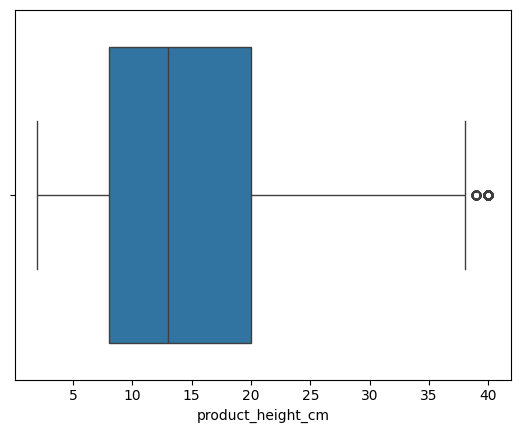

In [232]:
sns.boxplot(x=products['product_height_cm'])

product_width_cm column

<Axes: xlabel='product_width_cm'>

<Axes: xlabel='product_width_cm'>

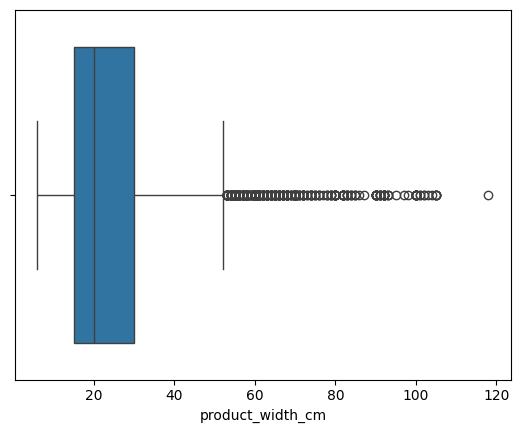

In [233]:
sns.boxplot(x=products['product_width_cm'])

In [234]:
products['product_width_cm'].describe()

count    32949.000000
mean        23.196728
std         12.079047
min          6.000000
25%         15.000000
50%         20.000000
75%         30.000000
max        118.000000
Name: product_width_cm, dtype: float64

In [237]:
median_product_width_cm= products['product_width_cm'].median()

print(f"Median is: { median_product_width_cm}")

Median is: 20.0


In [238]:
Q1 = products['product_width_cm'].quantile(0.25)
Q3 = products['product_width_cm'].quantile(0.75)
IQR = Q3 - Q1

upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR

upper_limit, lower_limit

(np.float64(52.5), np.float64(-7.5))

In [239]:
products['product_width_cm'] = np.where(
    (products['product_width_cm'] < lower_limit) | (products['product_width_cm'] > upper_limit),
    median_product_width_cm,
    products['product_width_cm']
)

In [240]:
products['product_width_cm'].describe()

count    32949.000000
mean        21.975417
std          9.744783
min          6.000000
25%         15.000000
50%         20.000000
75%         28.000000
max         52.000000
Name: product_width_cm, dtype: float64

<Axes: xlabel='product_width_cm'>

<Axes: xlabel='product_width_cm'>

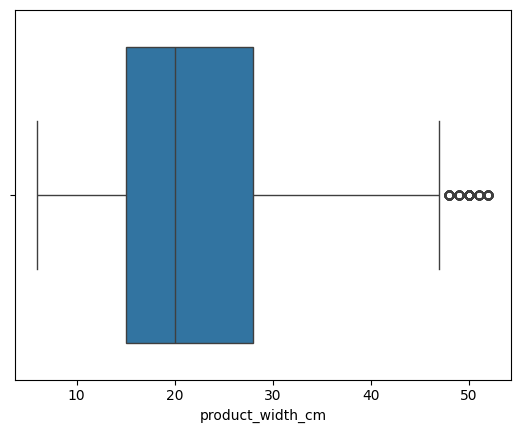

In [241]:
sns.boxplot(x=products['product_width_cm'])

# Checking missing values

In [242]:
products.isnull().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [243]:
mode_category = products['product_category_name'].mode()
fill_value = products['product_category_name'].mode()[0]
products['product_category_name'].fillna(fill_value, inplace=True)

In [244]:
numerical_cols_to_fill = [
    'product_name_lenght',
    'product_description_lenght',
    'product_photos_qty',
    'product_weight_g',
    'product_length_cm',
    'product_height_cm',
    'product_width_cm'
]
for col in numerical_cols_to_fill:
    mean_value = products[col].mean()
    products[col].fillna(mean_value, inplace=True)
print(products[numerical_cols_to_fill].isnull().sum())

product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64


# Sellers Table

In [245]:
sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [246]:
sellers.tail()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
3090,98dddbc4601dd4443ca174359b237166,87111,sarandi,PR
3091,f8201cab383e484733266d1906e2fdfa,88137,palhoca,SC
3092,74871d19219c7d518d0090283e03c137,4650,sao paulo,SP
3093,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS
3094,9e25199f6ef7e7c347120ff175652c3b,12051,taubate,SP


In [247]:
sellers.shape

(3095, 4)

In [248]:
sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [249]:
sellers.dtypes

seller_id                 object
seller_zip_code_prefix     int64
seller_city               object
seller_state              object
dtype: object

In [250]:
sellers.columns

Index(['seller_id', 'seller_zip_code_prefix', 'seller_city', 'seller_state'], dtype='object')

# Check Null values

In [251]:
sellers.isnull().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

# Check duplicates

In [252]:
sellers.duplicated().sum()

np.int64(0)

# Check datatypes

In [253]:
sellers.dtypes

seller_id                 object
seller_zip_code_prefix     int64
seller_city               object
seller_state              object
dtype: object

# Handle outlaires

seller_zip_code_prefix column

<Axes: xlabel='seller_zip_code_prefix'>

<Axes: xlabel='seller_zip_code_prefix'>

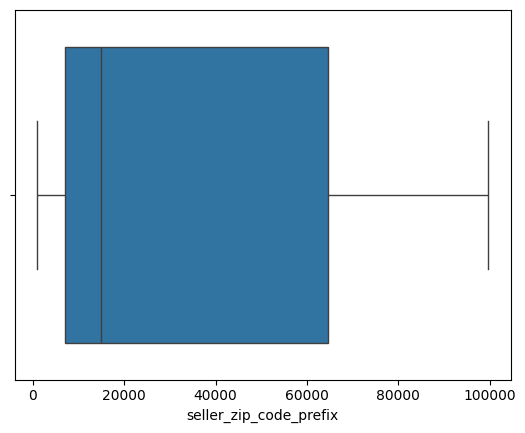

In [254]:
sns.boxplot(x=sellers['seller_zip_code_prefix'])

In [255]:
sellers['seller_zip_code_prefix'].describe()

count     3095.000000
mean     32291.059451
std      32713.453830
min       1001.000000
25%       7093.500000
50%      14940.000000
75%      64552.500000
max      99730.000000
Name: seller_zip_code_prefix, dtype: float64

In [256]:
median_seller_zip_code_prefix= sellers['seller_zip_code_prefix'].median()

print(f"Median is: { median_seller_zip_code_prefix}")

Median is: 14940.0


In [257]:
Q1 = sellers['seller_zip_code_prefix'].quantile(0.25)
Q3 = sellers['seller_zip_code_prefix'].quantile(0.75)
IQR = Q3 - Q1

upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR

upper_limit, lower_limit

(np.float64(150741.0), np.float64(-79095.0))

In [258]:
sellers['seller_zip_code_prefix'] = np.where(
    (sellers['seller_zip_code_prefix'] < lower_limit) | (sellers['seller_zip_code_prefix'] > upper_limit),
    median_seller_zip_code_prefix,
    sellers['seller_zip_code_prefix']
)

In [259]:
sellers['seller_zip_code_prefix'].describe()

count     3095.000000
mean     32291.059451
std      32713.453830
min       1001.000000
25%       7093.500000
50%      14940.000000
75%      64552.500000
max      99730.000000
Name: seller_zip_code_prefix, dtype: float64

<Axes: xlabel='seller_zip_code_prefix'>

<Axes: xlabel='seller_zip_code_prefix'>

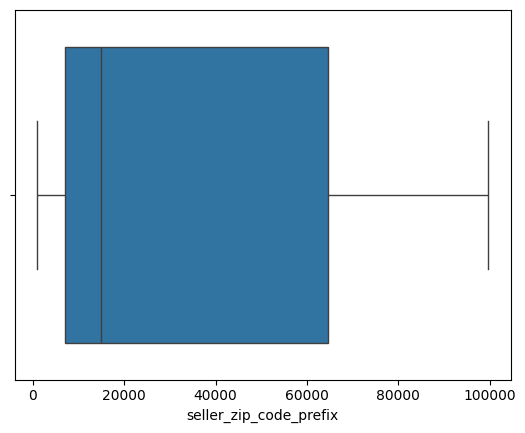

In [260]:
sns.boxplot(x=sellers['seller_zip_code_prefix'])

# product_category_name Table

In [261]:
product_category_name.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [262]:
product_category_name.tail()

,product_category_name,product_category_name_english
66,flores,flowers
67,artes_e_artesanato,arts_and_craftmanship
68,fraldas_higiene,diapers_and_hygiene
69,fashion_roupa_infanto_juvenil,fashion_childrens_clothes
70,seguros_e_servicos,security_and_services


In [263]:
product_category_name.shape

(71, 2)

In [264]:
product_category_name.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [265]:
product_category_name.columns

Index(['product_category_name', 'product_category_name_english'], dtype='object')

In [266]:
product_category_name.dtypes

product_category_name            object
product_category_name_english    object
dtype: object

# Check missing values

In [267]:
product_category_name.isnull().sum()

product_category_name            0
product_category_name_english    0
dtype: int64

# Check duplicates

In [268]:
product_category_name.duplicated().sum()

np.int64(0)

# Check data types

In [269]:
product_category_name.dtypes

product_category_name            object
product_category_name_english    object
dtype: object

# Save Cleanes Tables 

In [270]:
output_path = './' 
customers.to_csv(output_path + 'customers.csv', index=False)
geolocation.to_csv(output_path + 'geolocation.csv', index=False)
order_items.to_csv(output_path + 'order_items.csv', index=False)
order_payments.to_csv(output_path + 'payments.csv', index=False)
order_reviews.to_csv(output_path + 'reviews.csv', index=False)
orders.to_csv(output_path + 'orders.csv', index=False)
products.to_csv(output_path + 'products.csv', index=False)
sellers.to_csv(output_path + 'sellers.csv', index=False)
product_category_name.to_csv(output_path + 'product_category_name.csv', index=False)

In [271]:

df = orders.merge(order_items, on='order_id') \
    .merge(products, on='product_id') \
    .merge(customers, on='customer_id') \
    .merge(order_reviews, on='order_id') \
    .merge(order_payments, on='order_id') \
    .merge(sellers, on='seller_id') \
    .merge(product_category_name, on='product_category_name')

# Data Analysis Phase

In [281]:
df.head(2)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delay,order_item_id,...,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,-8 days +21:25:13,1.0,...,2017-10-11,2017-10-12 03:43:48,1.0,credit_card,1.0,18.12,9350.0,maua,SP,housewares
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,-8 days +21:25:13,1.0,...,2017-10-11,2017-10-12 03:43:48,1.0,voucher,1.0,2.00,9350.0,maua,SP,housewares


In [273]:
df.isnull().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
delay                            0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
product_category_name            0
product_name_lenght              0
product_description_lenght       0
product_photos_qty               0
product_weight_g                 0
product_length_cm                0
product_height_cm                0
product_width_cm                 0
customer_unique_id               0
customer_zip_code_prefix         0
customer_city                    0
customer_state                   0
review_id                        0
review_score        

In [282]:
df.duplicated().sum()

np.int64(0)

In [283]:
df.drop_duplicates(inplace=True)

In [284]:
df.duplicated().sum()

np.int64(0)

In [285]:
df.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'delay', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value',
       'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'customer_unique_id', 'customer_zip_code_prefix', 'customer_city',
       'customer_state', 'review_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'seller_zip_code_prefix',
       'seller_city', 'seller_state', 'product_category_name_english'],
      dtype='object')

In [278]:
df.dtypes

order_id                                  object
customer_id                               object
order_status                              object
order_purchase_timestamp          datetime64[ns]
order_approved_at                 datetime64[ns]
order_delivered_carrier_date      datetime64[ns]
order_delivered_customer_date     datetime64[ns]
order_estimated_delivery_date     datetime64[ns]
delay                            timedelta64[ns]
order_item_id                            float64
product_id                                object
seller_id                                 object
shipping_limit_date               datetime64[ns]
price                                    float64
freight_value                            float64
product_category_name                     object
product_name_lenght                      float64
product_description_lenght               float64
product_photos_qty                       float64
product_weight_g                         float64
product_length_cm   

<Axes: xlabel='payment_type'>

<Axes: xlabel='payment_type'>

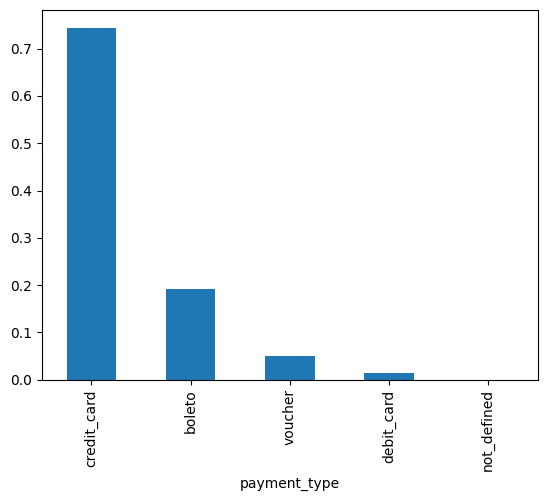

In [279]:
df['payment_type'].value_counts(normalize=True).plot(kind='bar')

"Credit card is the most dominant payment method, accounting for approximately 75% of total transactions, followed by Boleto at nearly 20%."

<Axes: ylabel='Density'>

<Axes: ylabel='Density'>

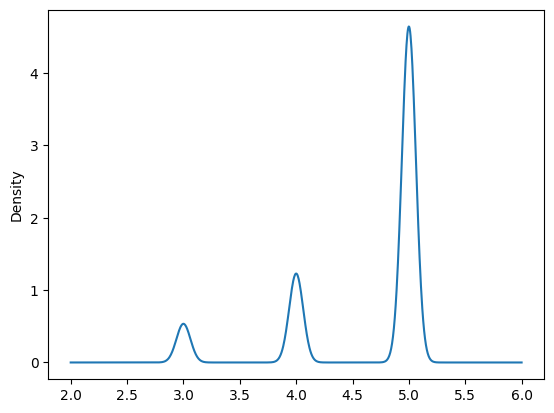

In [286]:
df['review_score'].plot(kind='density')

"The majority of customers provided a perfect rating (5.0). The density peaks at 4.0 and 5.0 confirm that the business maintains a strong positive reputation among its users."

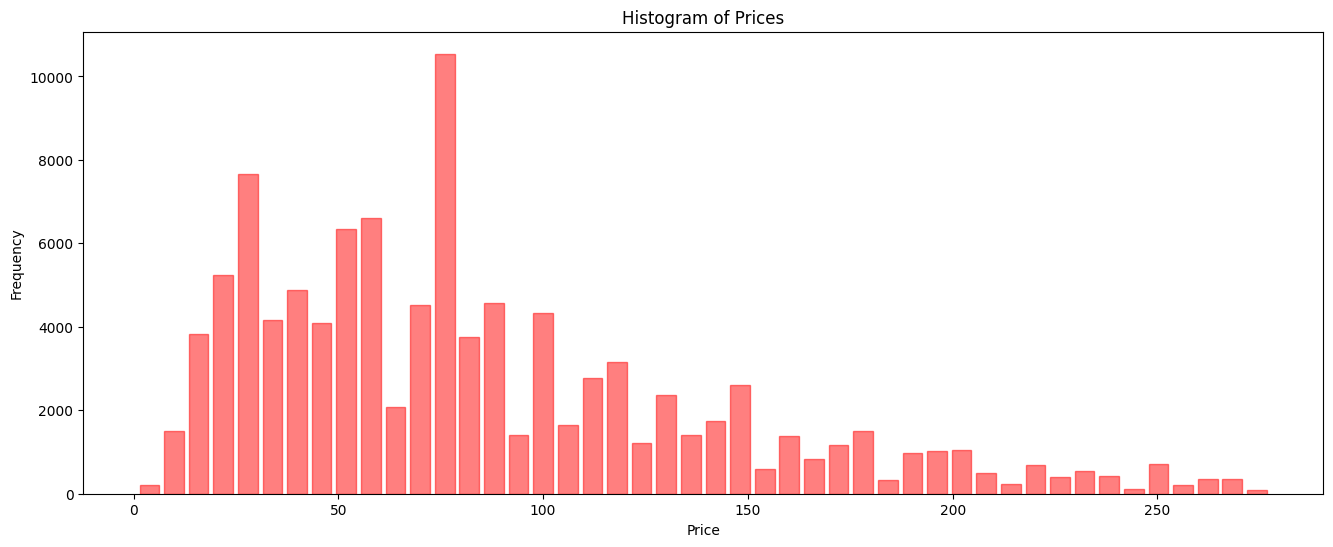

In [287]:
plt.figure(figsize=(16, 6))
plt.hist(df['price'], bins=46, edgecolor='red', color='red', alpha=0.5, rwidth=0.8)

plt.title('Histogram of Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.xticks(rotation=0) 
plt.show()

"Most of the inventory or sales fall into the affordable category (under 100 units), while high-end products (above 200) represent a very small fraction of the dataset."

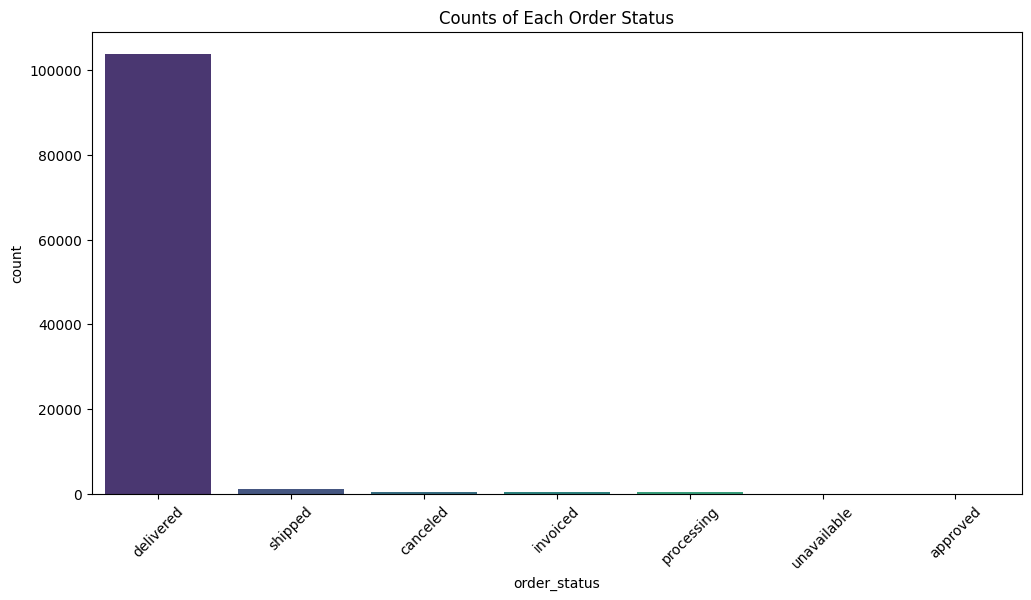

In [288]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='order_status', palette='viridis', order=df['order_status'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Counts of Each Order Status')
plt.show()

The massive bar for "delivered" shows that your core business process is working. The vast majority of orders are reaching customers successfully.

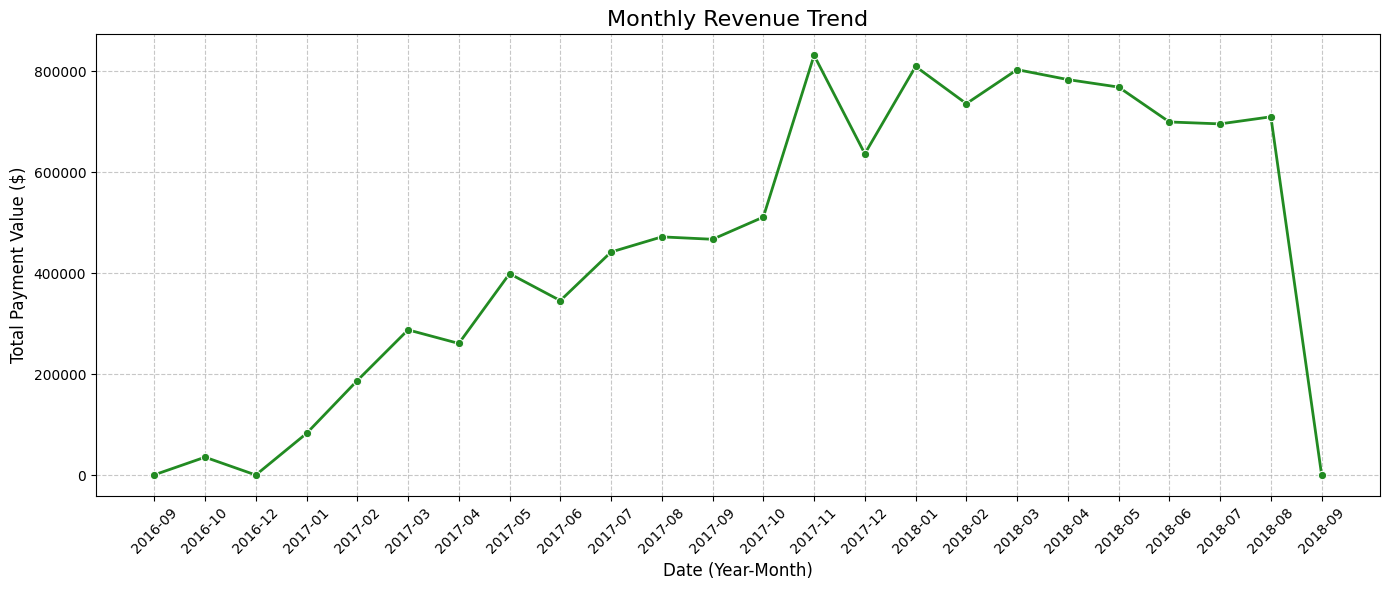

In [289]:
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])
df['month_year'] = df['order_purchase_timestamp'].dt.to_period('M').astype(str)
monthly_sales = df.groupby('month_year')['payment_value'].sum().reset_index()
plt.figure(figsize=(14, 6))
sns.lineplot(data=monthly_sales, x='month_year', y='payment_value', marker='o', color='forestgreen', linewidth=2)
plt.title('Monthly Revenue Trend', fontsize=16)
plt.xlabel('Date (Year-Month)', fontsize=12)
plt.ylabel('Total Payment Value ($)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

1. Strong Growth Phase
From early 2017 through late 2017, you had a very healthy upward trend. Revenue grew from almost nothing to over $800,000 in less than a year.

2. The "Black Friday" Spike
There is a massive peak in November 2017. This is typical for e-commerce and likely represents a major sales event (like Black Friday), followed by a natural dip in December.

3. Plateau in 2018
Throughout 2018, the revenue stopped growing and started to "plateau" (stay flat) or slightly decline. This suggests the business reached a limit or needs a new marketing strategy to keep growing.

4. The Data "Cliff" (Warning)
There is a huge drop to nearly zero in September 2018.

Insight: This usually isn't a business failure; it's a data issue. It likely means the dataset ends in the first few days of that month, so you don't have the full month's sales yet.

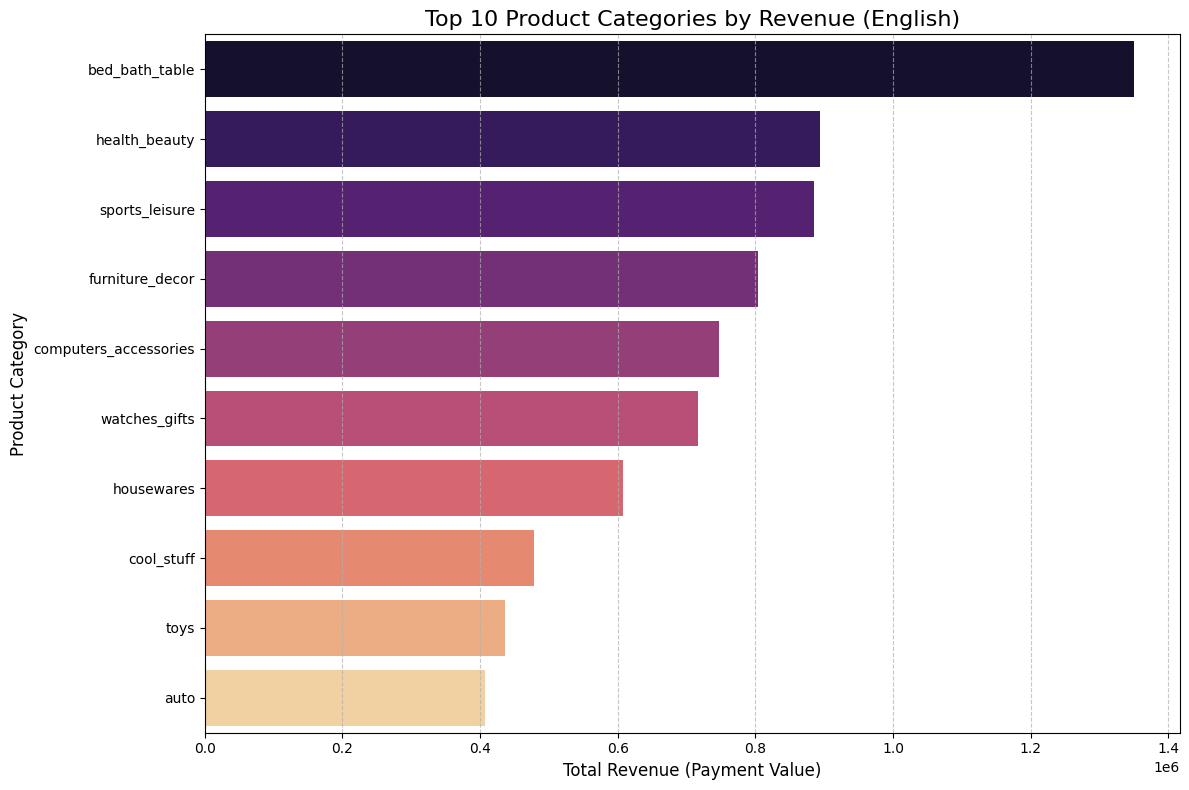

In [290]:
category_revenue = df.groupby('product_category_name_english')['payment_value'].sum().sort_values(ascending=False).reset_index()
top_10_categories = category_revenue.head(10)
plt.figure(figsize=(12, 8))
sns.barplot(data=top_10_categories,  x='payment_value',  y='product_category_name_english', palette='magma')
plt.title('Top 10 Product Categories by Revenue (English)', fontsize=16)
plt.xlabel('Total Revenue (Payment Value)', fontsize=12)
plt.ylabel('Product Category', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Dominant Leader: The bed_bath_table category is the clear market leader, generating significantly more revenue than any other category (approaching $1.4$ million).

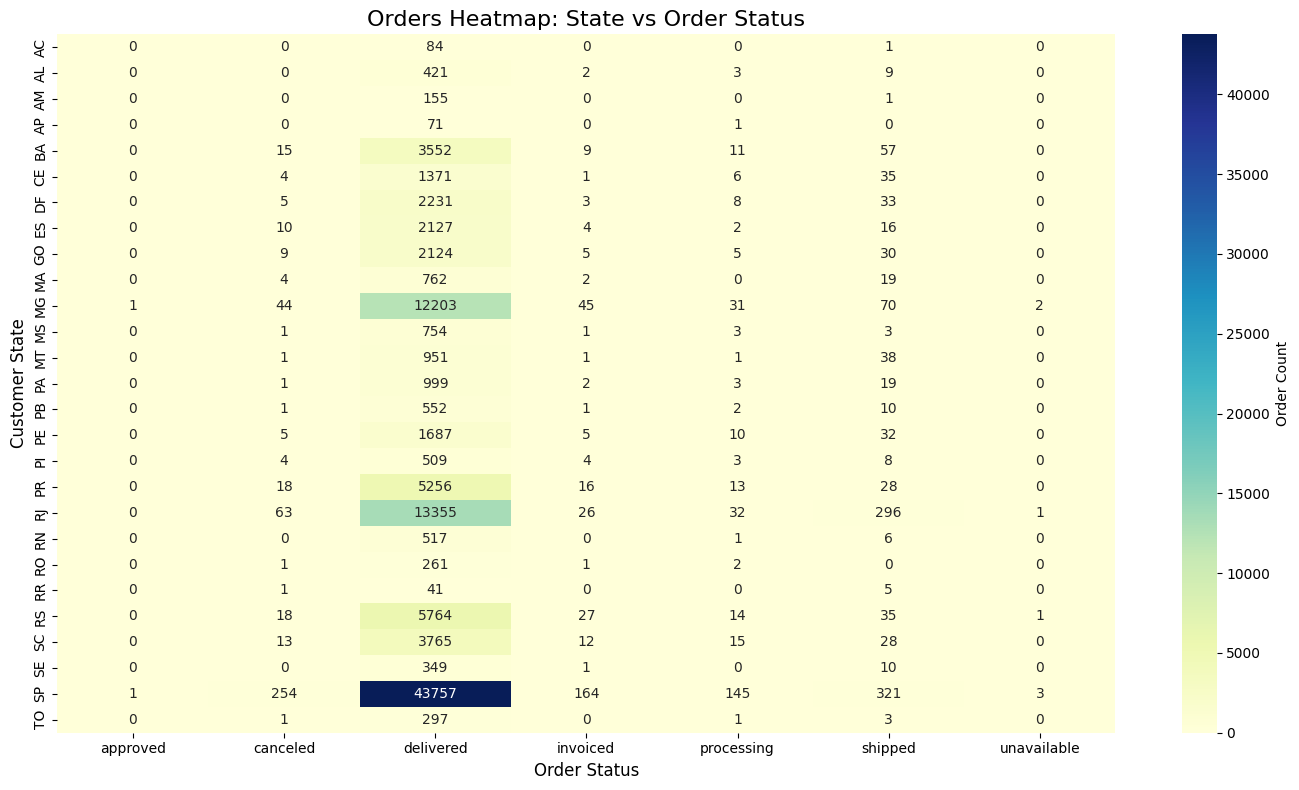

In [291]:
geo_status_pivot = df.pivot_table(index='customer_state', columns='order_status',  values='order_id',   aggfunc='count').fillna(0)
plt.figure(figsize=(14, 8))
sns.heatmap(geo_status_pivot, annot=True, fmt='g', cmap='YlGnBu', cbar_kws={'label': 'Order Count'})
plt.title('Orders Heatmap: State vs Order Status', fontsize=16)
plt.xlabel('Order Status', fontsize=12)
plt.ylabel('Customer State', fontsize=12)
plt.tight_layout()
plt.show()

Dominant Market: The state of SP (São Paulo) is the undisputed leader in order volume, with 43,757 successfully delivered orders.
The data confirms that the business is highly centralized in the Southeast region of Brazil. The vast majority of revenue and logistics activity is concentrated in SP, RJ, and MG, while other states contribute significantly less to the overall order count.

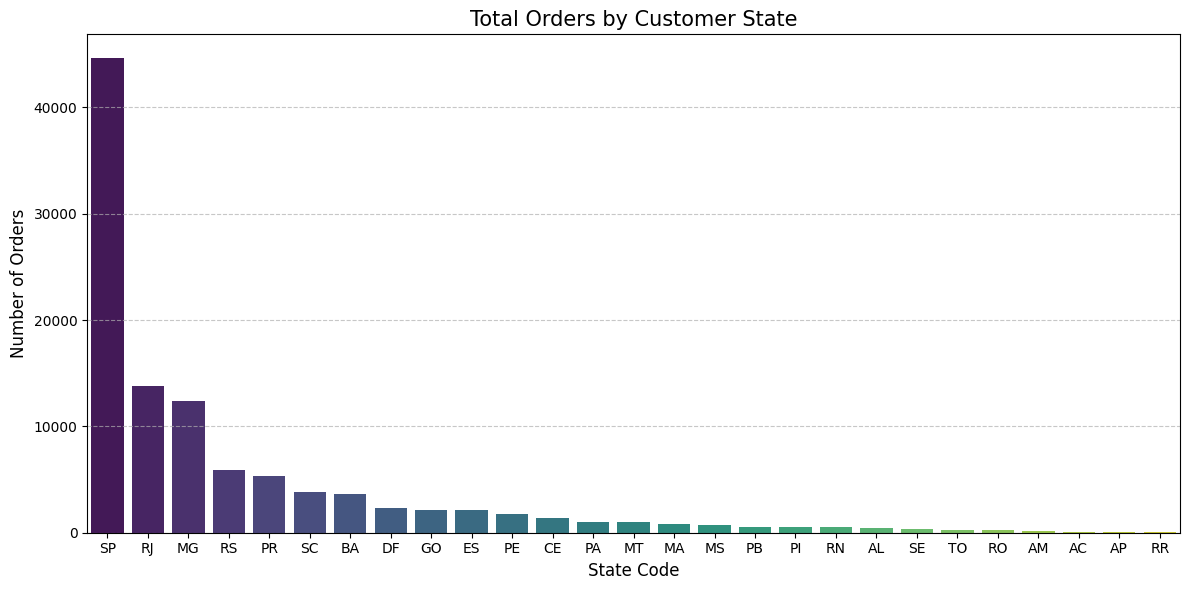

In [292]:
state_counts = df['customer_state'].value_counts().reset_index()
state_counts.columns = ['customer_state', 'order_count']
plt.figure(figsize=(12, 6))
sns.barplot(data=state_counts, x='customer_state', y='order_count', palette='viridis')
plt.title('Total Orders by Customer State', fontsize=15)
plt.xlabel('State Code', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

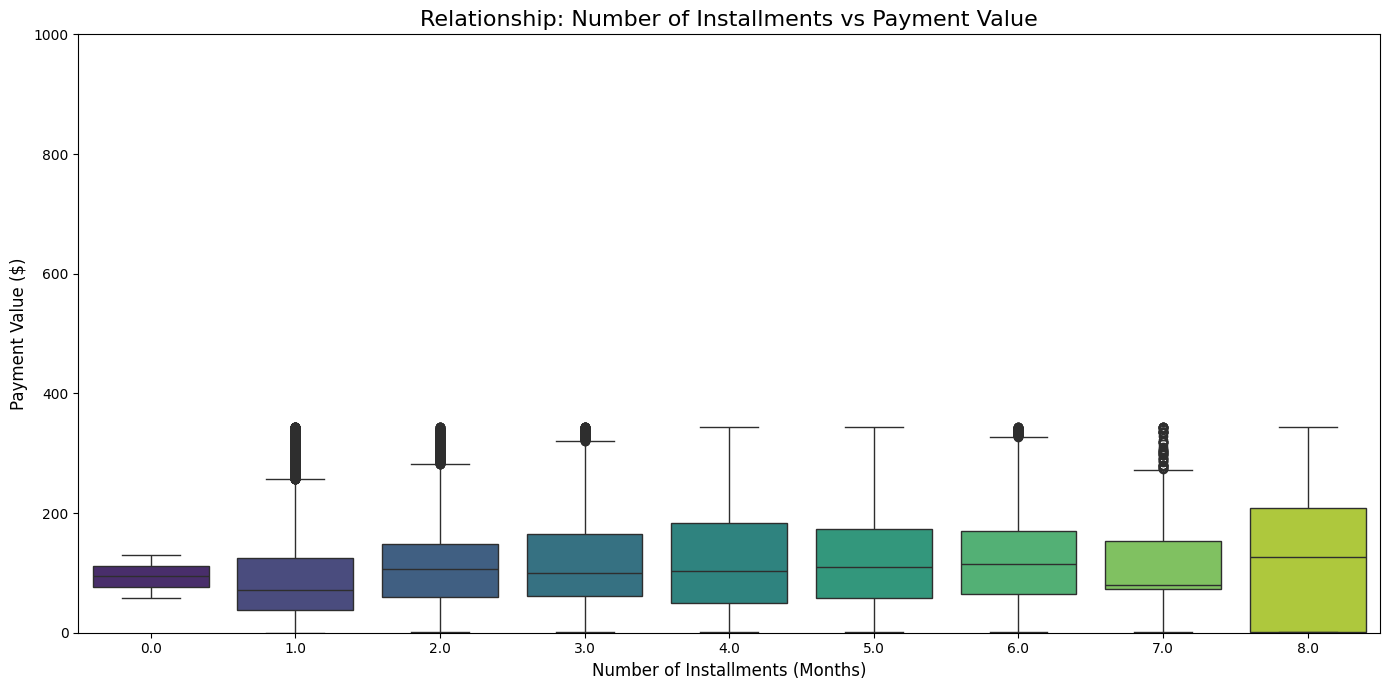

In [294]:
# 1. Filter for Credit Card only as it's the main method for installments
credit_card_data = df[df['payment_type'] == 'credit_card']
plt.figure(figsize=(14, 7))
sns.boxplot(data=credit_card_data, x='payment_installments', y='payment_value', palette='viridis')
plt.ylim(0, 1000) 
plt.title('Relationship: Number of Installments vs Payment Value', fontsize=16)
plt.xlabel('Number of Installments (Months)', fontsize=12)
plt.ylabel('Payment Value ($)', fontsize=12)
plt.tight_layout()
plt.show()

Positive Correlation: Generally, as the number of installments increases, the median payment value also tends to rise, especially from 1 to 4 installments.

Higher Variance: For a higher number of installments (like 8.0), the spread (interquartile range) is much wider. This suggests that customers choosing long-term plans have a more diverse range of payment amounts.

Outliers: There are significant outliers across most categories, particularly between 1 and 7 installments, where some payments are much higher than the average for that group.

Stability at 4-6 Months: The median payment value stays relatively stable and consistent for plans between 4 and 6 installments

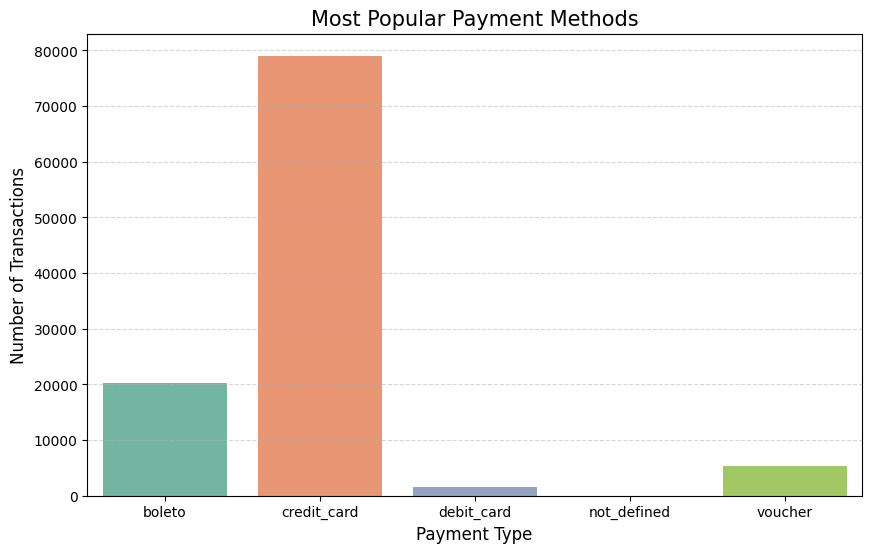

In [295]:
payment_counts = df['payment_type'].value_counts().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=payment_counts, x='payment_type', y='count', palette='Set2')
plt.title('Most Popular Payment Methods', fontsize=15)
plt.xlabel('Payment Type', fontsize=12)
plt.ylabel('Number of Transactions', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

Dominant Payment Method: Credit Card is by far the most popular method, accounting for nearly 80,000 transactions.

Secondary Choice: Boleto ranks second, though it has significantly fewer transactions (around 20,000) compared to credit cards.

Minority Methods: Voucher and Debit Card are used much less frequently, with debit cards being the least common defined method.

Negligible Data: The Not Defined category is virtually non-existent in this dataset.

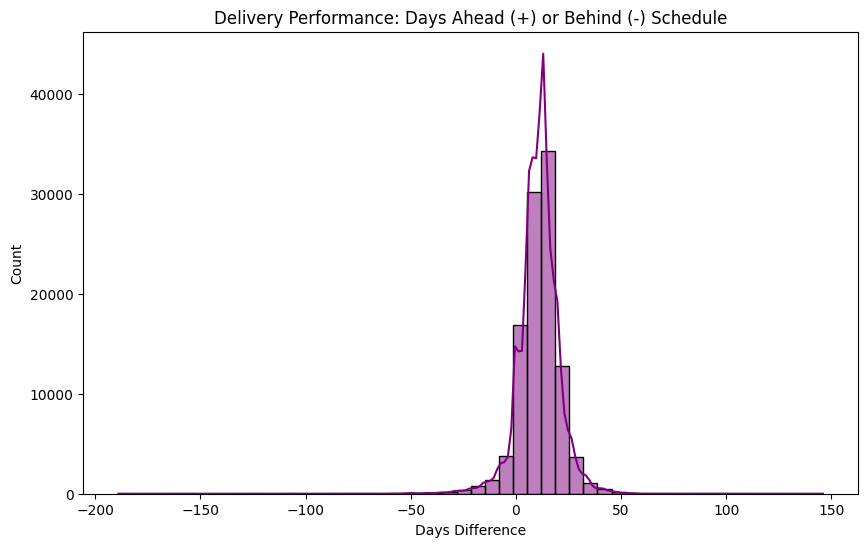

In [296]:
df['delivery_diff'] = (pd.to_datetime(df['order_estimated_delivery_date']) - pd.to_datetime(df['order_delivered_customer_date'])).dt.days
plt.figure(figsize=(10, 6))
sns.histplot(df['delivery_diff'], bins=50, kde=True, color='purple')
plt.title('Delivery Performance: Days Ahead (+) or Behind (-) Schedule')
plt.xlabel('Days Difference')
plt.show()

The data shows a strong Positive Skew, meaning the vast majority of deliveries are completed 10 to 20 days ahead of schedule.

Reliability: Late deliveries (negative values) are extremely rare, indicating a highly reliable logistics process.

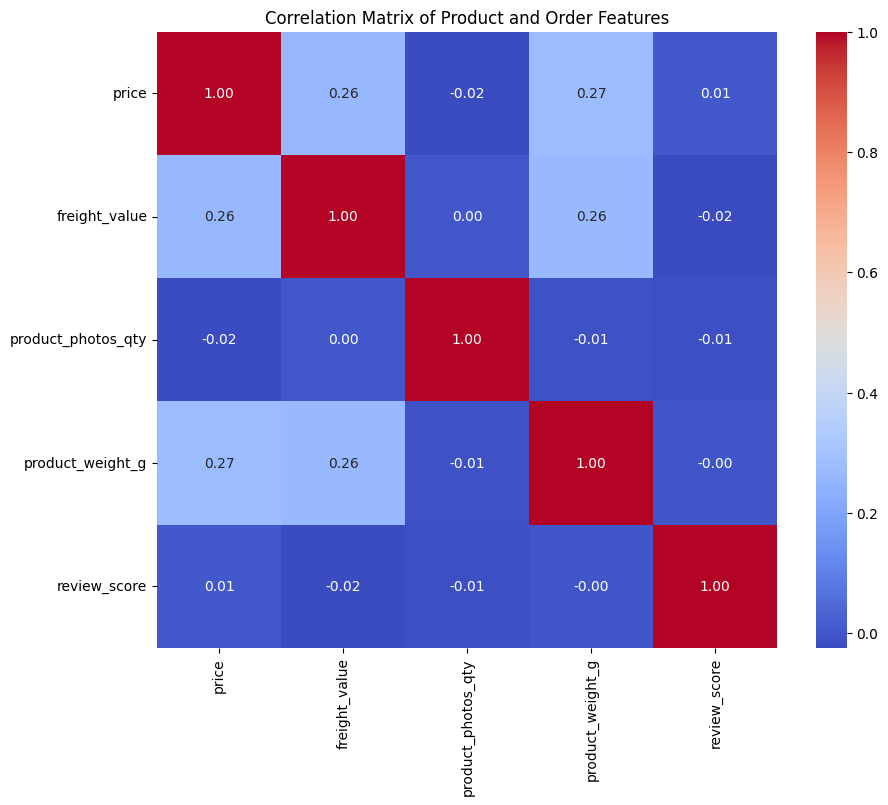

In [297]:
numerical_cols = df[['price', 'freight_value', 'product_photos_qty', 'product_weight_g', 'review_score']]
corr = numerical_cols.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Product and Order Features')
plt.show()

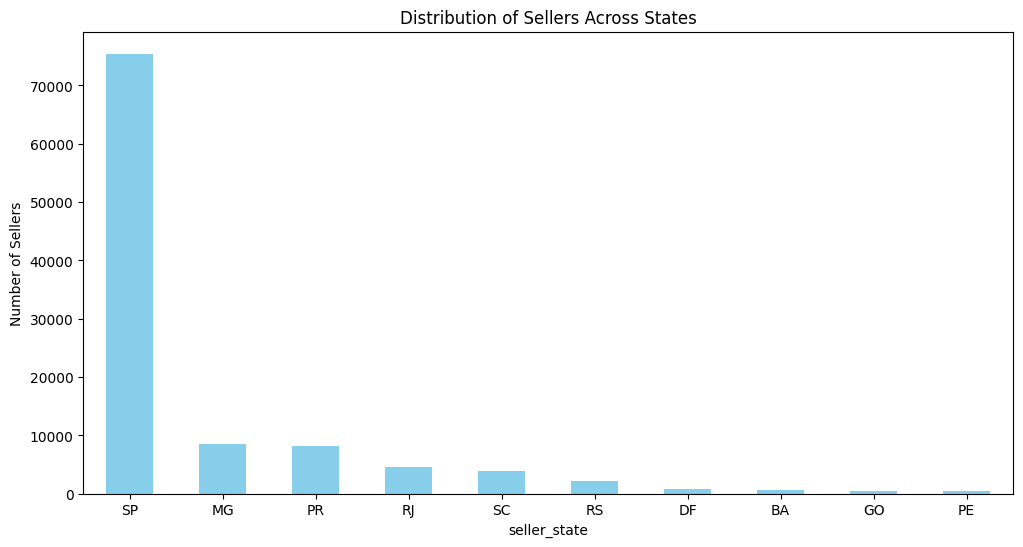

In [298]:
top_seller_states = df['seller_state'].value_counts().head(10)

plt.figure(figsize=(12, 6))
top_seller_states.plot(kind='bar', color='skyblue')
plt.title('Distribution of Sellers Across States')
plt.ylabel('Number of Sellers')
plt.xticks(rotation=0)
plt.show()

Market Strategy: If you are looking to expand, focusing on SP offers the highest volume, but also the highest competition. Conversely, the low numbers in states like BA or PE might represent untapped market opportunities if logistics can be solved.

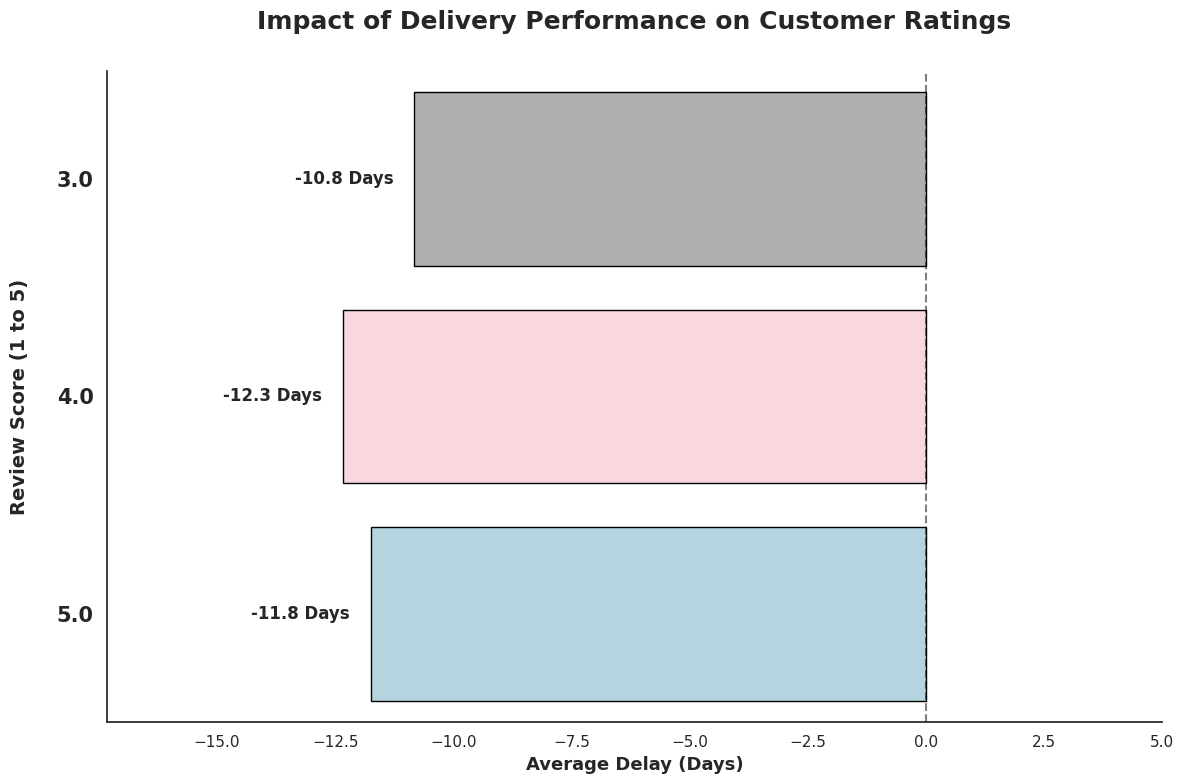

In [299]:
sns.set_theme(style="white")
plt.figure(figsize=(12, 8))
custom_colors = ["#B0B0B0", "#FFD1DC", "#ADD8E6", "#C0C0C0", "#F4C2C2"]
df['order_delivered_customer_date'] = pd.to_datetime(df['order_delivered_customer_date'])
df['order_estimated_delivery_date'] = pd.to_datetime(df['order_estimated_delivery_date'])
df['calculated_delay'] = (df['order_delivered_customer_date'] - df['order_estimated_delivery_date']).dt.days

delay_satisfaction = df.groupby('review_score')['calculated_delay'].mean().reset_index()
ax = sns.barplot(data=delay_satisfaction, x='calculated_delay', y='review_score', palette=custom_colors, orient='h', edgecolor='black', linewidth=1)
plt.ylabel('Review Score (1 to 5)', fontsize=14, fontweight='bold', labelpad=20)
plt.yticks(fontsize=15, fontweight='bold')
for i in ax.containers:
    ax.bar_label(i, padding=15, fmt='%.1f Days', fontsize=12, fontweight='bold')
current_min = delay_satisfaction['calculated_delay'].min()
plt.xlim(current_min - 5, 5) 
plt.title('Impact of Delivery Performance on Customer Ratings', fontsize=18, fontweight='bold', pad=30)
plt.xlabel('Average Delay (Days)', fontsize=13, fontweight='bold')
plt.axvline(0, color='black', linestyle='--', linewidth=1.5, alpha=0.5)
sns.despine()
plt.tight_layout()
plt.show()

Early Deliveries: All average delay values are negative, indicating that products are arriving 11 to 12 days before the estimated delivery date.

Correlation with Satisfaction: Higher ratings (4.0 and 5.0) are directly linked to items arriving roughly 12 days early.

Impact of Speed: When the lead time advantage drops to 10.8 days early, the review score falls to a 3.0, showing that customers are sensitive to even small changes in delivery speed.

Conclusion: Exceeding delivery expectations by nearly two weeks is the key driver for maintaining top-tier customer ratings.

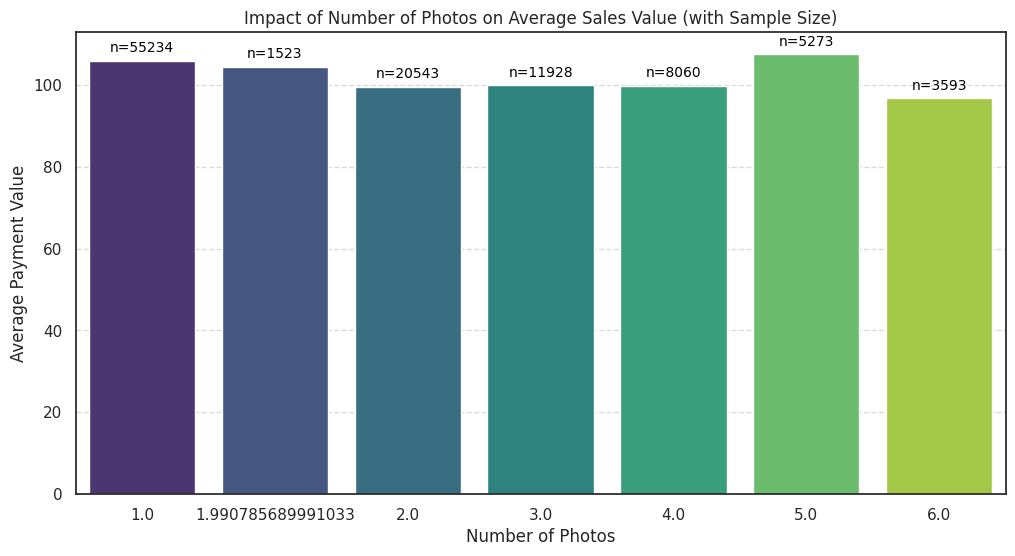

In [300]:
photo_stats = df.groupby('product_photos_qty')['payment_value'].agg(['mean', 'count']).reset_index()
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=photo_stats, x='product_photos_qty', y='mean', palette='viridis')
for i, p in enumerate(ax.patches):
    count = photo_stats.iloc[i]['count']
    ax.annotate(f'n={int(count)}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 9), textcoords='offset points', fontsize=10, color='black')
plt.title('Impact of Number of Photos on Average Sales Value (with Sample Size)')
plt.ylabel('Average Payment Value')
plt.xlabel('Number of Photos')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [304]:
pip install openpyxl

  Using cached openpyxl-3.1.5-py2.py3-none-any.whl.metadata (2.5 kB)
  Using cached et_xmlfile-2.0.0-py3-none-any.whl.metadata (2.7 kB)
Using cached openpyxl-3.1.5-py2.py3-none-any.whl (250 kB)
Using cached et_xmlfile-2.0.0-py3-none-any.whl (18 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [openpyxl]
Note: you may need to restart the kernel to use updated packages.


In [305]:
df.to_excel('ecommerce_data_combined.xlsx', index=False)

print("Success! Your Excel file has been created.")

Success! Your Excel file has been created.
